In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os

### We read the DataFrames created in the notebook 'DataFrame Creation'

In [2]:
concat_df = pd.read_pickle('all_stats.pkl')
statsFastS = pd.read_pickle('statsFastS.pkl')
statsFreeS = pd.read_pickle('statsFreeS.pkl')

In [3]:
concat_df.head()

3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
subject Software                                                              
10019   FastSurfer         2335.3         3003.2            0.0     22947.8   
        FreeSurfer         2280.7         2919.5            0.0     22887.2   
10026   FastSurfer         2017.8         2357.3            0.0     20385.5   
        FreeSurfer         1948.6         2111.0            0.0     18946.6   
10032   FastSurfer         1020.2         1350.3            0.0     21828.4   

                    BrainSegVol  BrainSegVolNotVent  BrainSegVolNotVentSurf  \
subject Software                                                              
10019   FastSurfer    1206855.0          1175093.00            1.175647e+06   
        FreeSurfer    2142567.0          2090436.75            1.355871e+06   
10026   FastSurfer    1110897.0          1059210.00            1.059082e+06   
        FreeSurfer    1947982.5          1858903.50            1.145995e+06   
10032   FastSurfer    1204293.0          1183601.00            1.184661e+06   

                    CC_Anterior  CC_Central  CC_Mid_Anterior  ...  \
subject Software                                              ...   
10019   FastSurfer        928.5       667.8            330.6  ...   
        FreeSurfer        644.2       297.6            263.1  ...   
10026   FastSurfer        950.0       450.6            425.8  ...   
        FreeSurfer        687.2       312.0            319.0  ...   
10032   FastSurfer       1060.9       914.8           1092.3  ...   

                    SupraTentorialVol  SupraTentorialVolNotVent  \
subject Software                                                  
10019   FastSurfer       1.066739e+06              1.041607e+06   
        FreeSurfer       7.833151e+05              7.423591e+05   
10026   FastSurfer       1.002746e+06              9.567843e+05   
        FreeSurfer       7.289274e+05              6.494297e+05   
10032   FastSurfer       1.077000e+06              1.059472e+06   

                    SupraTentorialVolNotVentVox   TotalGrayVol  \
subject Software                                                 
10019   FastSurfer                    1039981.0  667488.665351   
        FreeSurfer                    2443176.0  688073.066914   
10026   FastSurfer                     956002.0  606974.728489   
        FreeSurfer                    2214913.0  602434.109773   
10032   FastSurfer                    1057021.0  623645.895177   

                    WM-hypointensities  lhCerebralWhiteMatterVol  \
subject Software                                                   
10019   FastSurfer              1927.9             241968.281419   
        FreeSurfer              2255.2             138740.914865   
10026   FastSurfer              2325.5             214797.860888   
        FreeSurfer              2676.0             109061.711366   
10032   FastSurfer               894.3             263883.923522   

                      lhCortexVol  non-WM-hypointensities  \
subject Software                                            
10019   FastSurfer  251468.157656                     0.0   
        FreeSurfer  189994.281391                     0.0   
10026   FastSurfer  238147.069588                     0.0   
        FreeSurfer  180018.256381                     2.1   
10032   FastSurfer  233179.819260                     0.0   

                    rhCerebralWhiteMatterVol    rhCortexVol  
subject Software                                             
10019   FastSurfer             241150.947036  249285.507695  
        FreeSurfer             138535.085734  190329.035524  
10026   FastSurfer             215416.673620  236342.658901  
        FreeSurfer             107108.351461  176151.853391  
10032   FastSurfer             269911.449888  235479.075916  

[5 rows x 59 columns]

In [4]:
#shape
concat_df.shape

(738, 59)

### Box plots representations to check median, quartiles and outliers in each variable

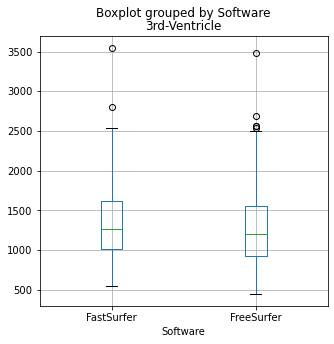

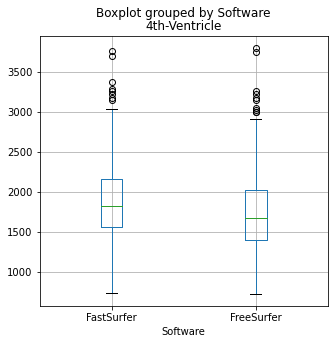

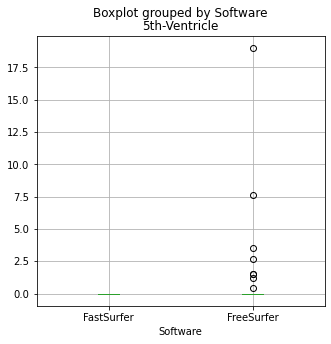

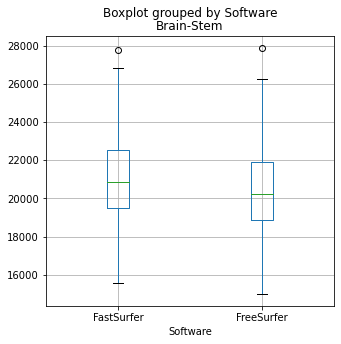

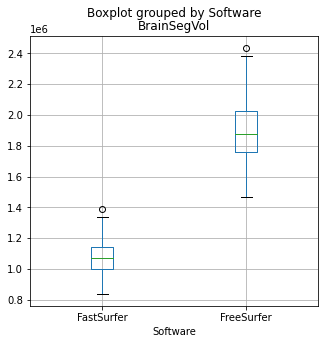

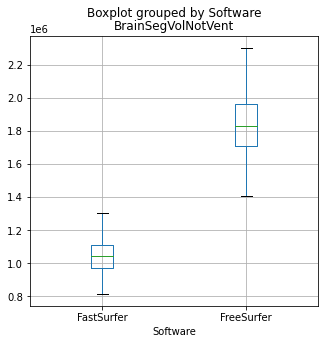

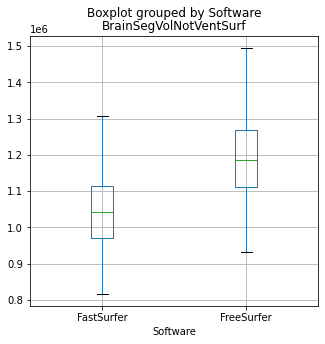

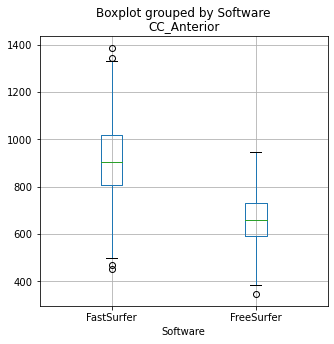

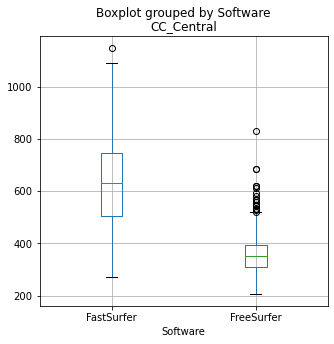

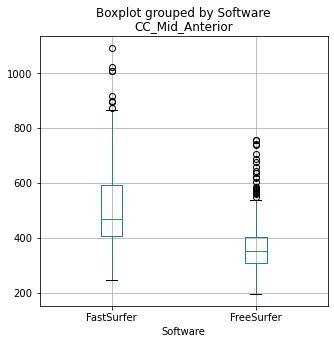

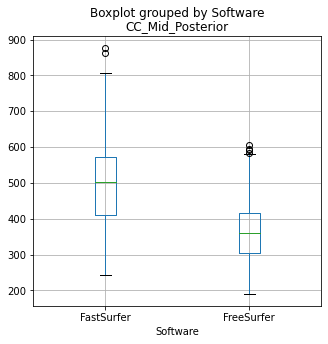

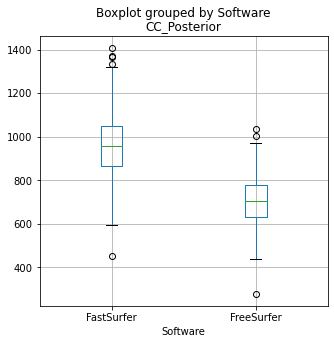

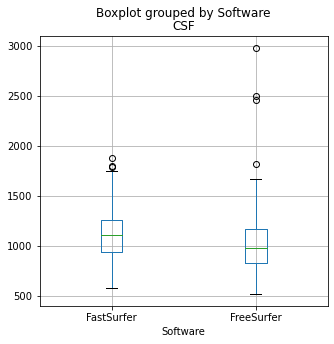

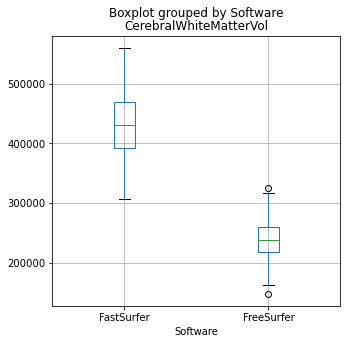

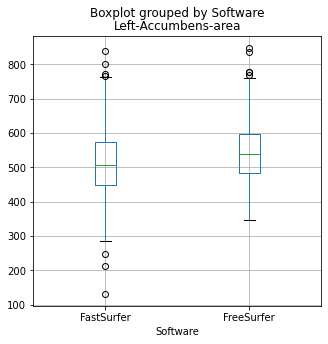

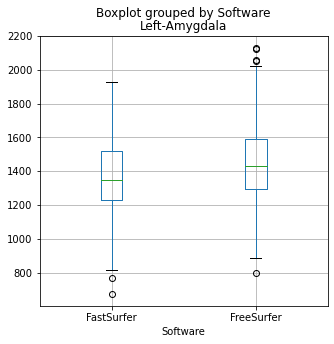

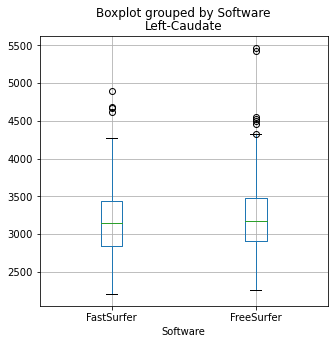

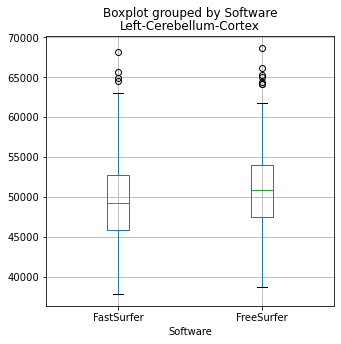

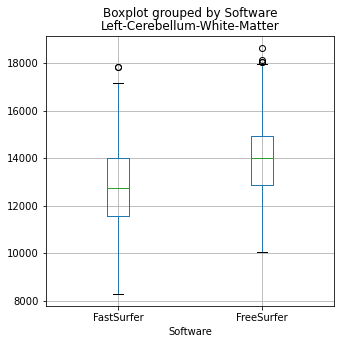

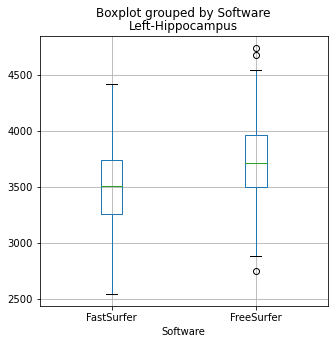

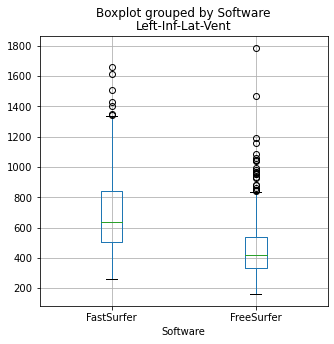

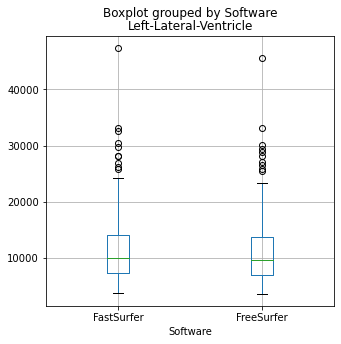

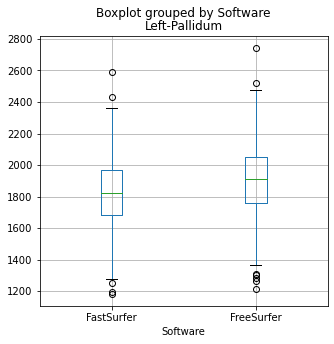

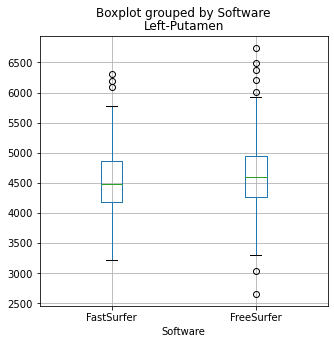

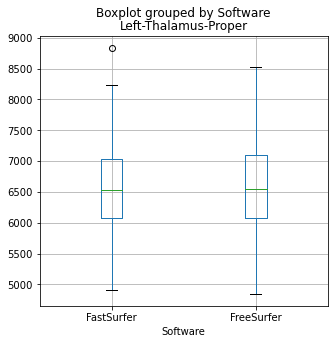

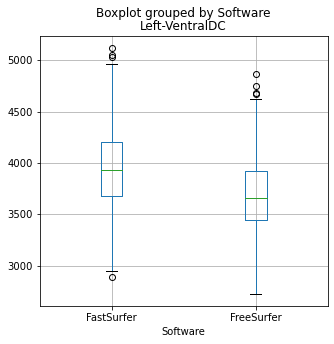

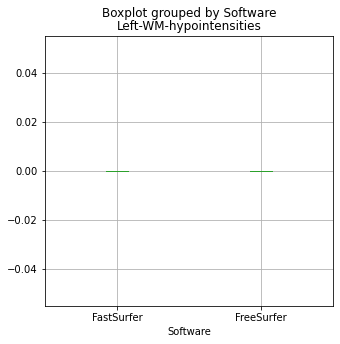

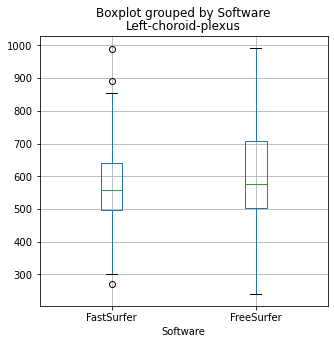

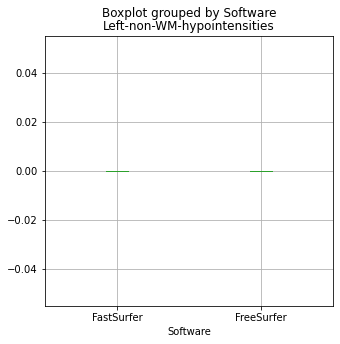

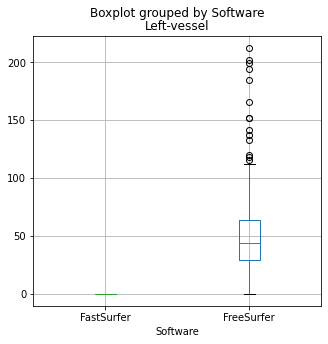

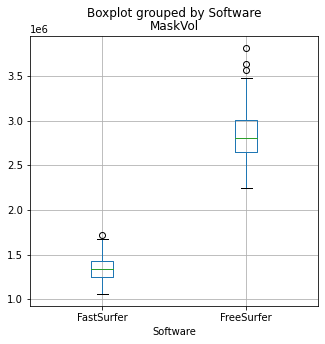

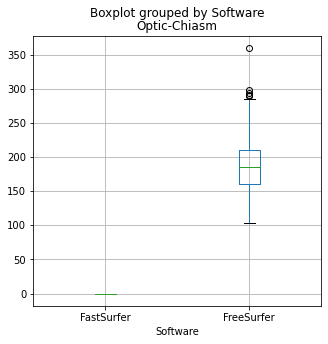

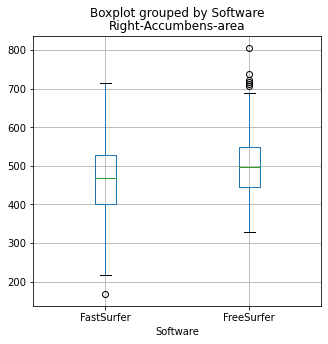

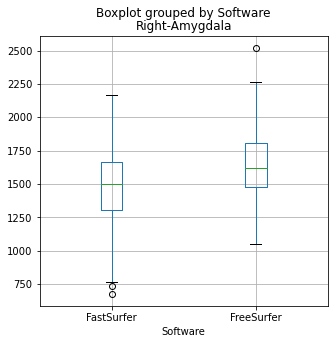

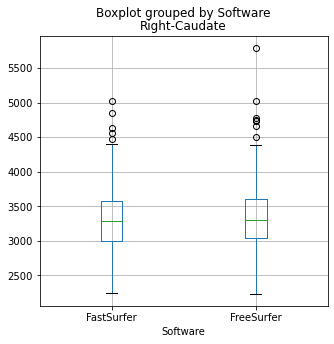

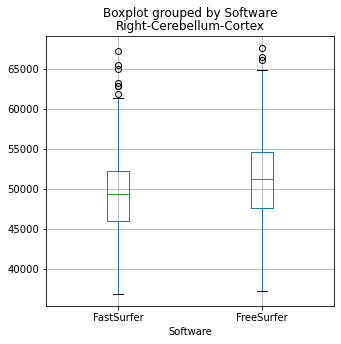

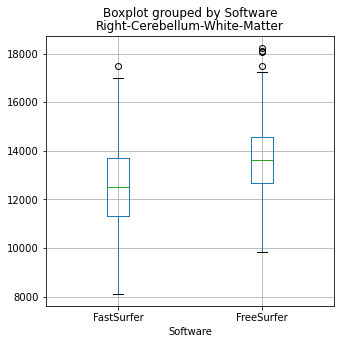

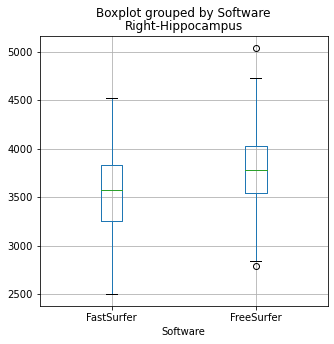

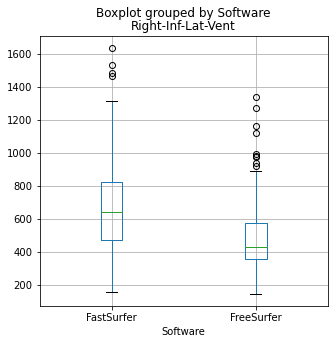

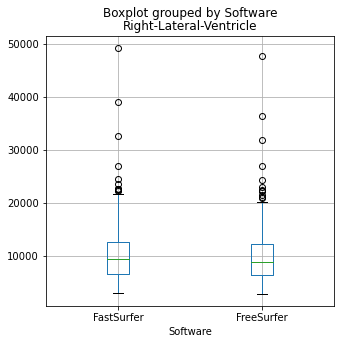

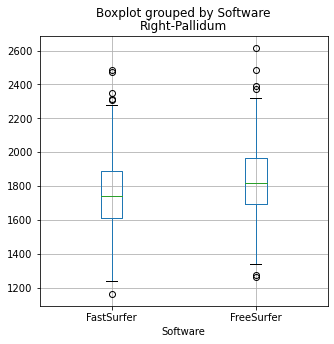

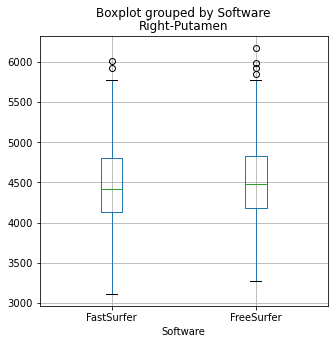

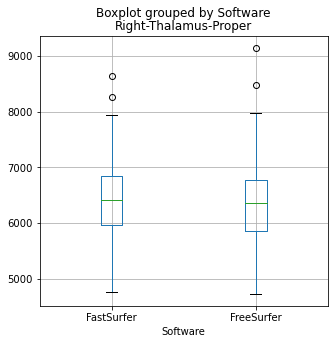

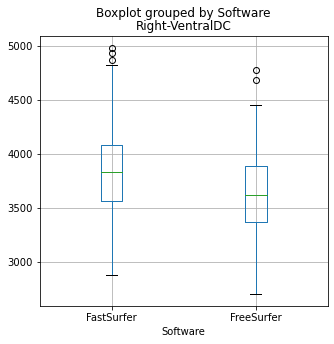

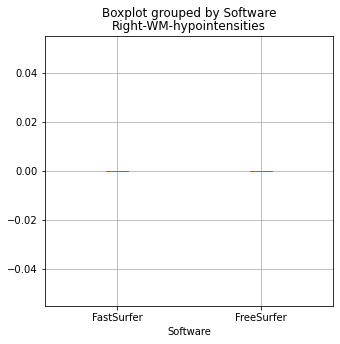

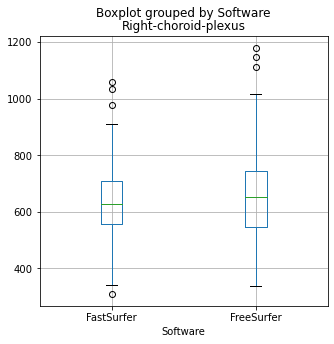

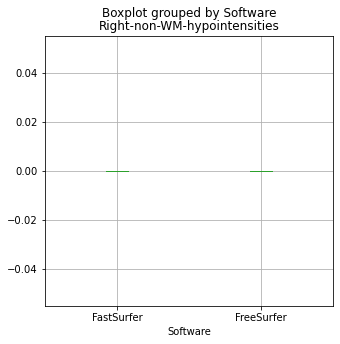

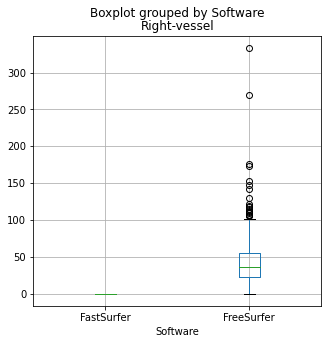

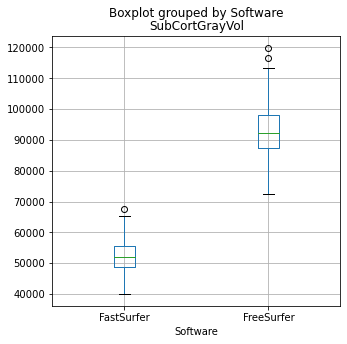

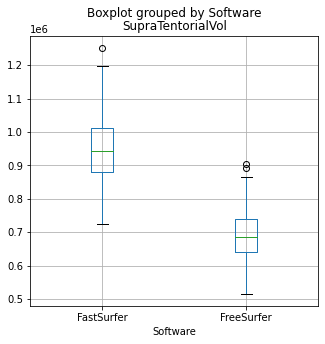

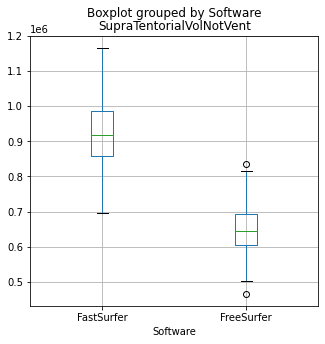

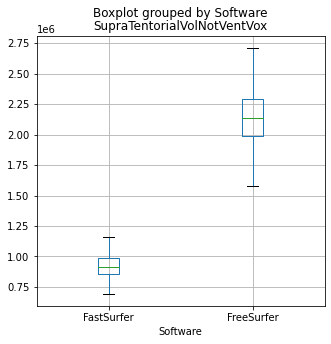

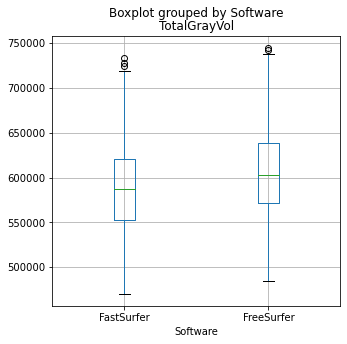

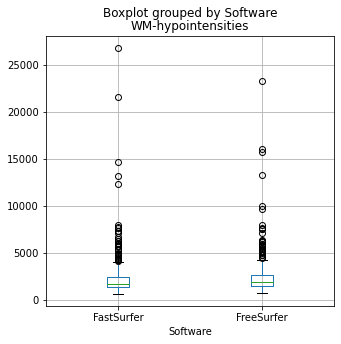

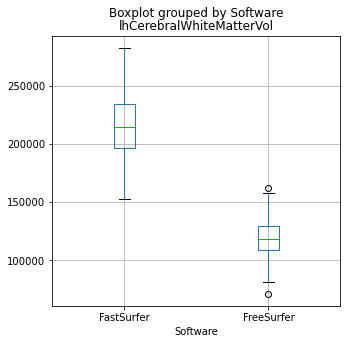

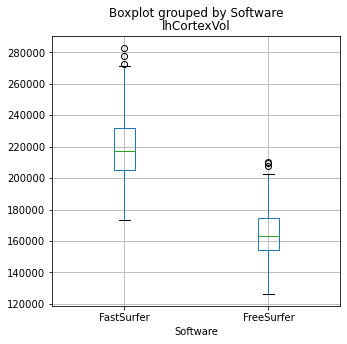

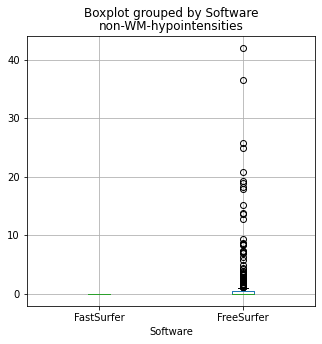

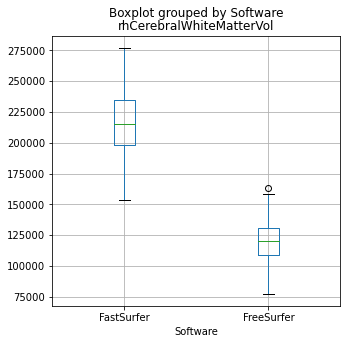

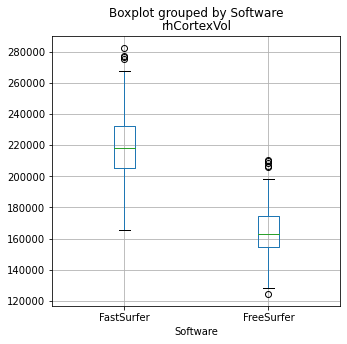

In [5]:
#Boxplots

for i in range(len(concat_df.columns.tolist())):
    concat_df.boxplot(column=concat_df.columns[i],by='Software',figsize=(5,5))
    plt.show()

### Histograms representation to check each variable distribution

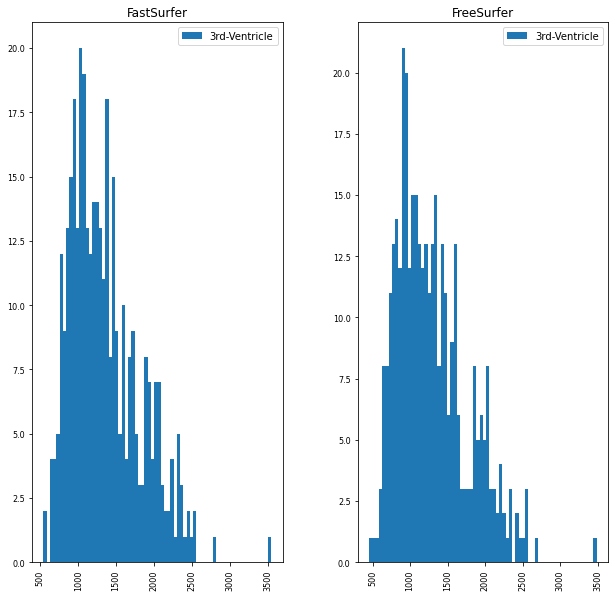

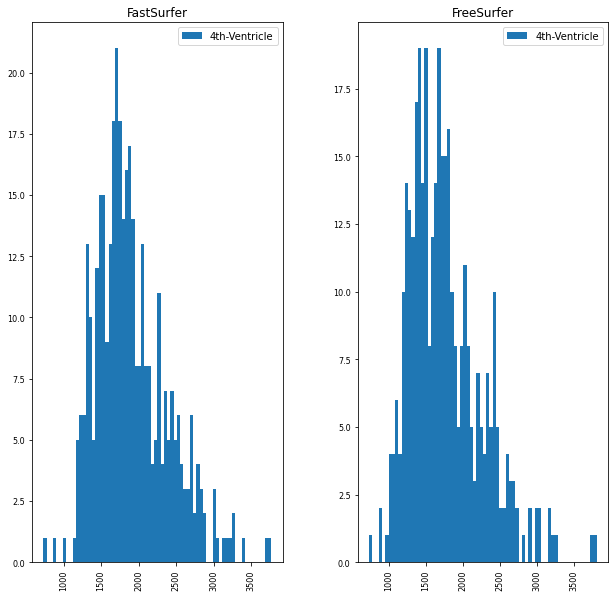

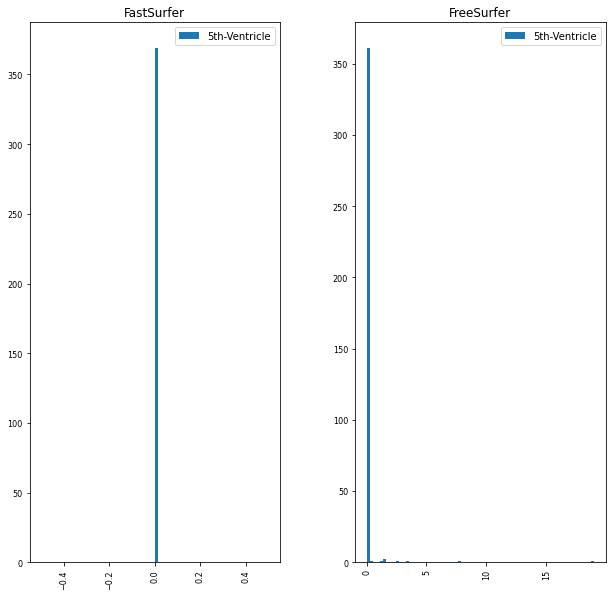

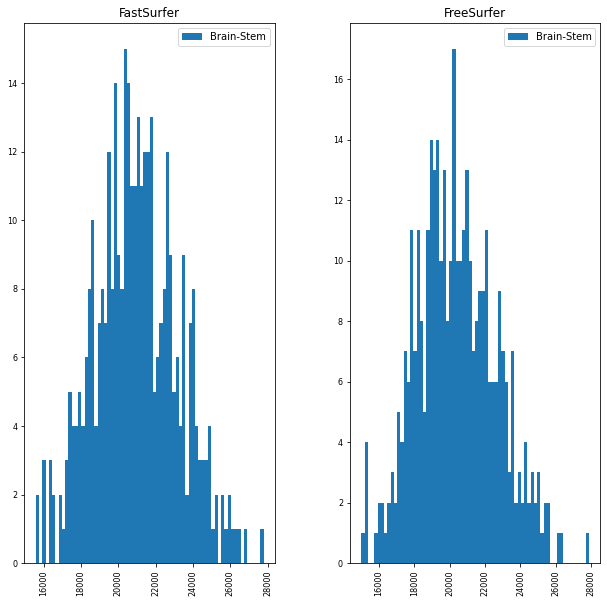

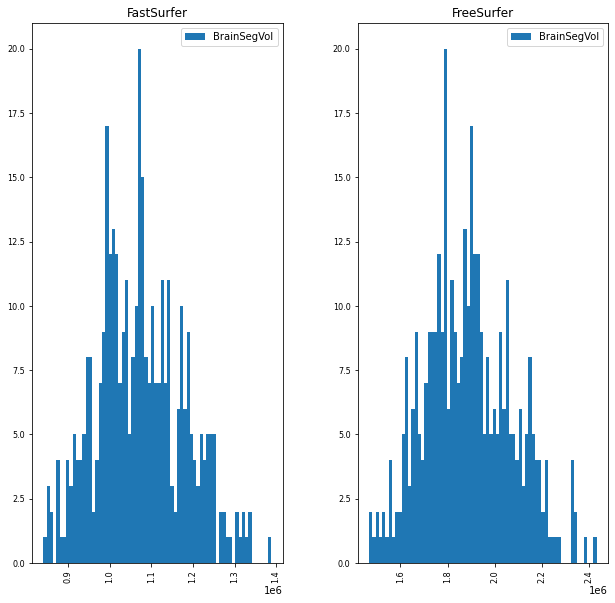

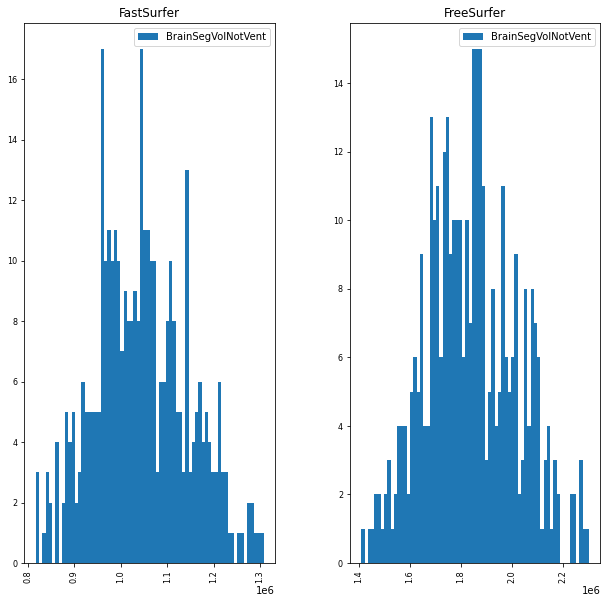

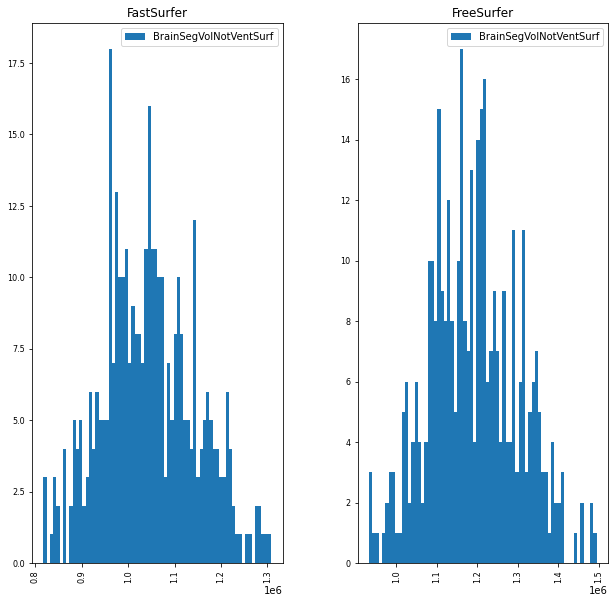

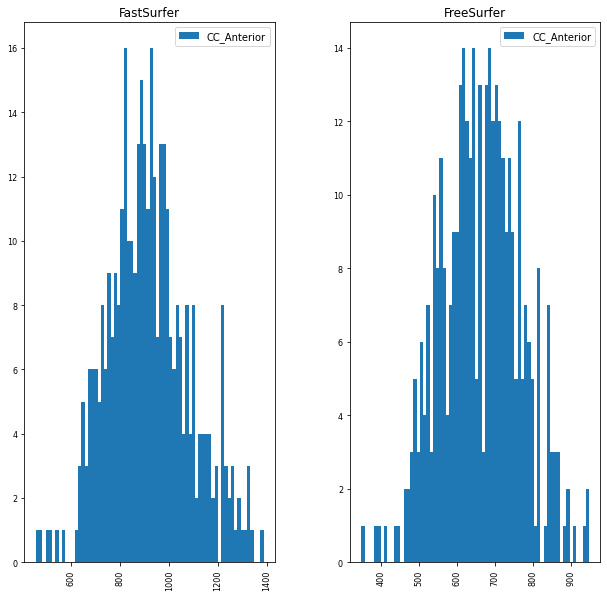

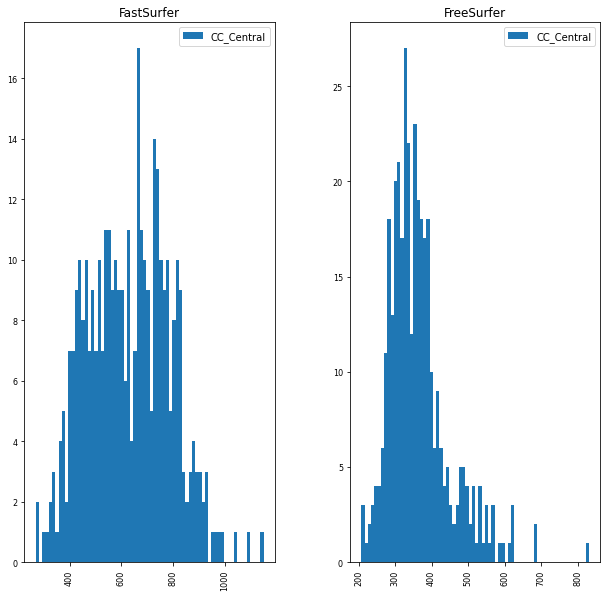

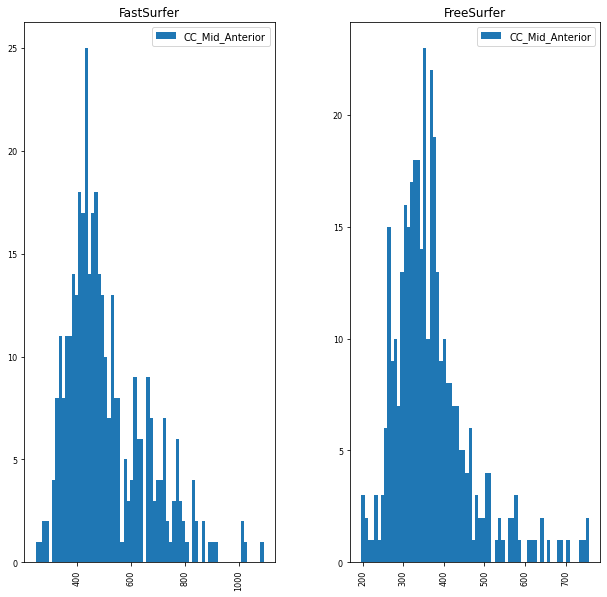

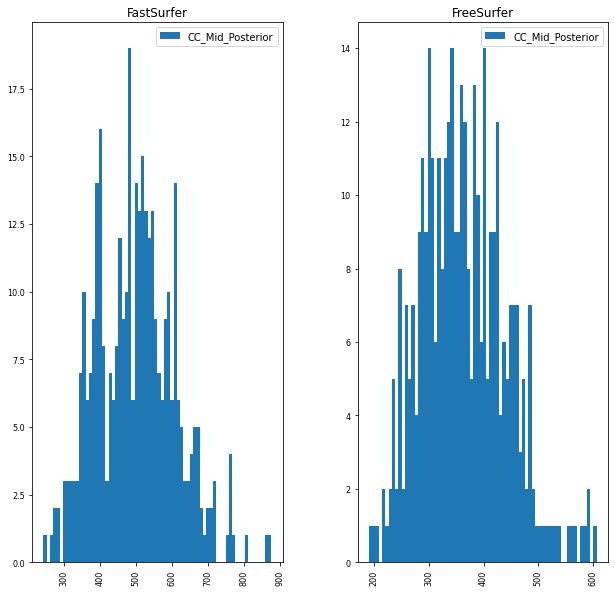

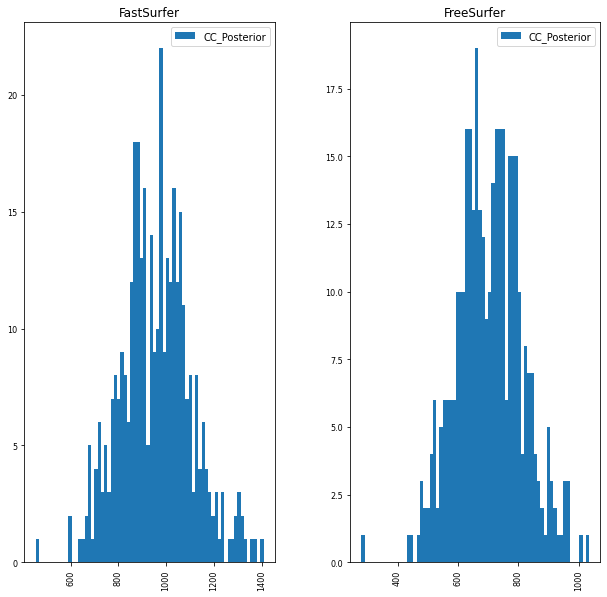

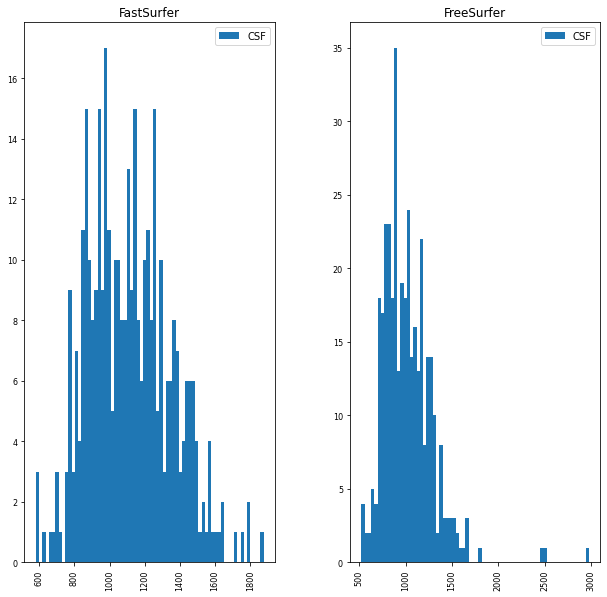

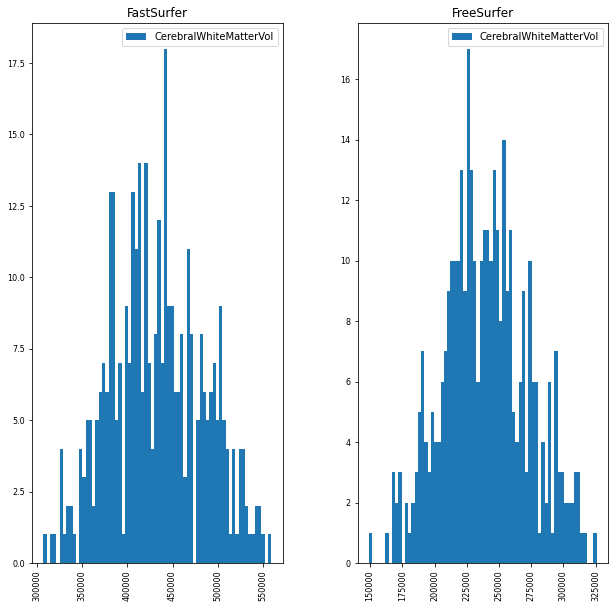

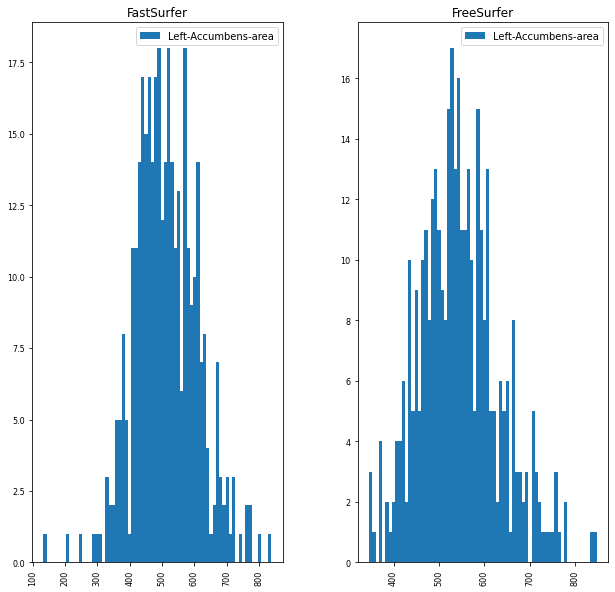

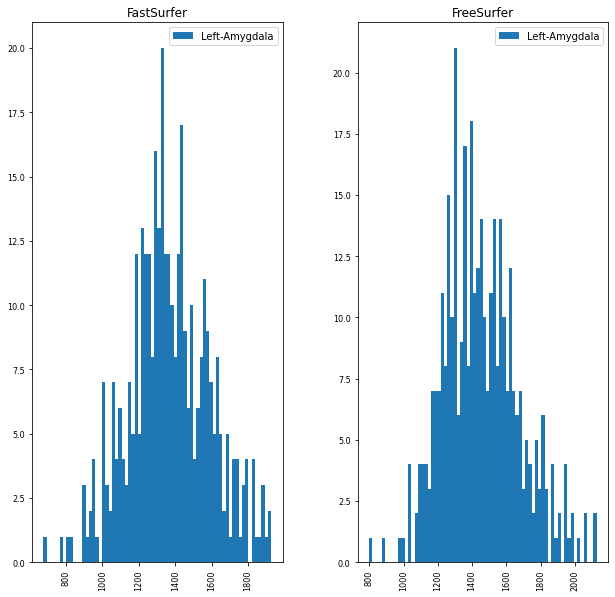

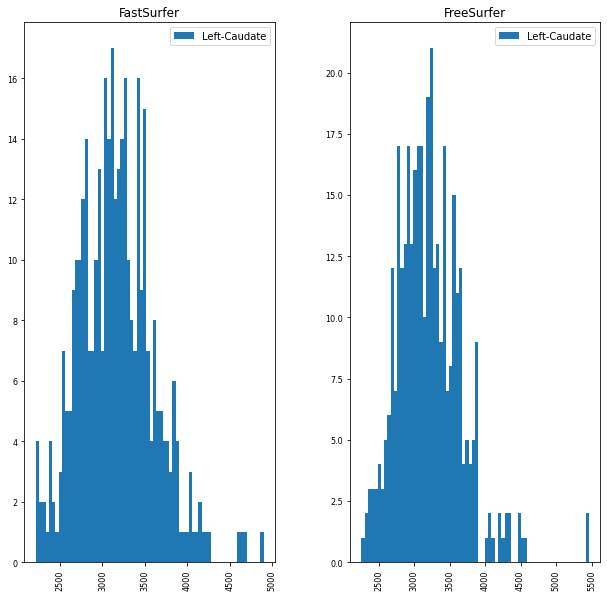

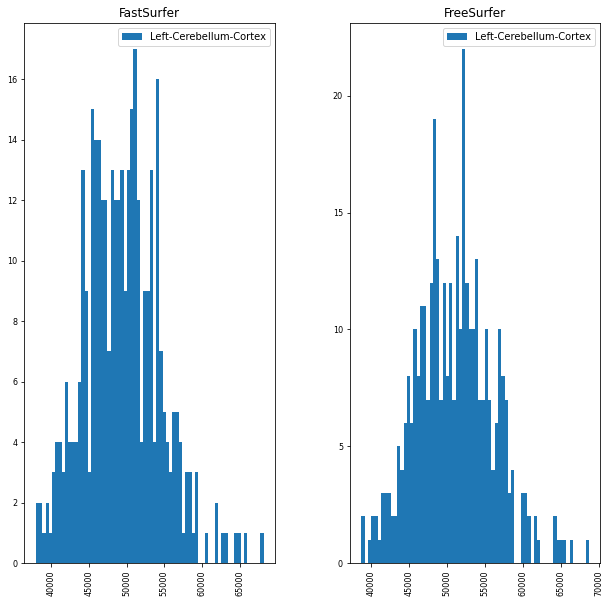

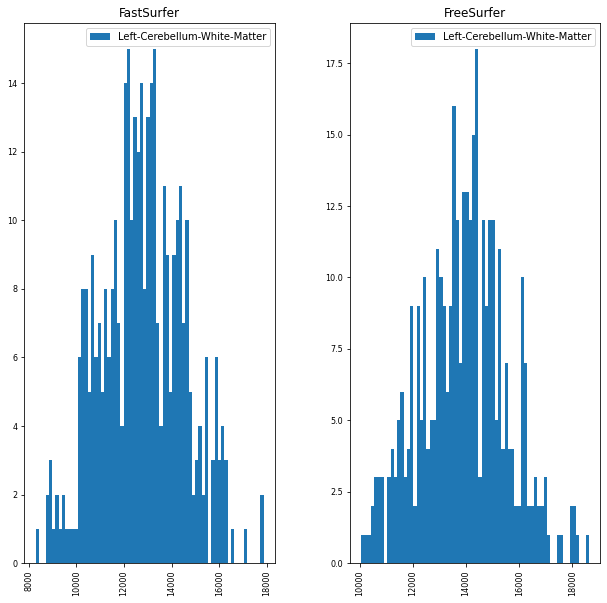

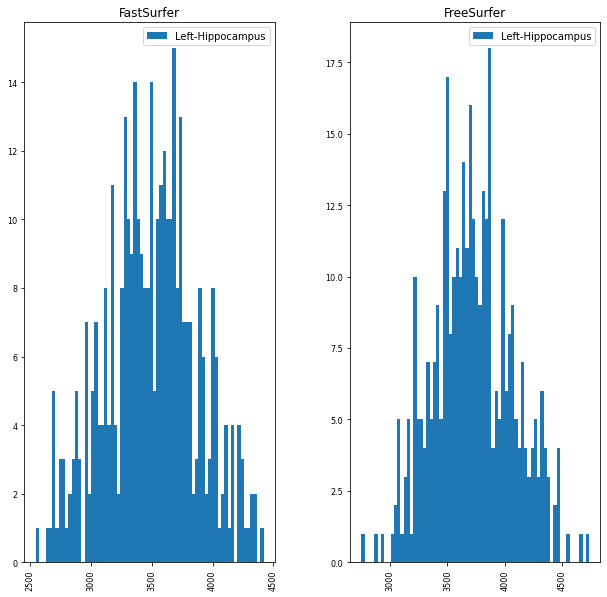

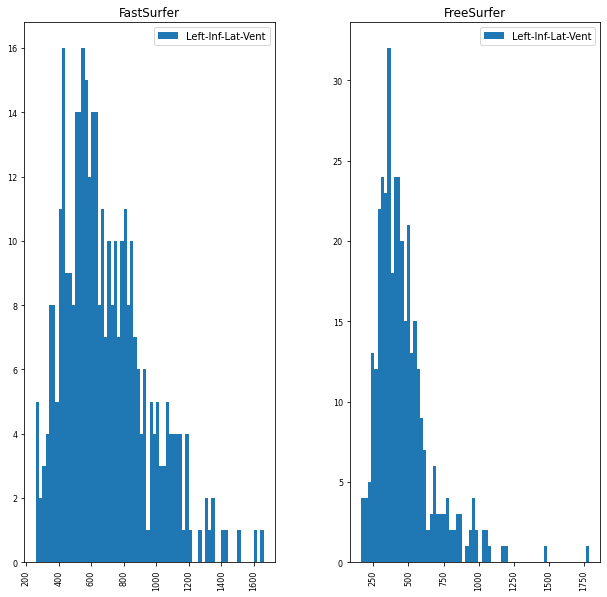

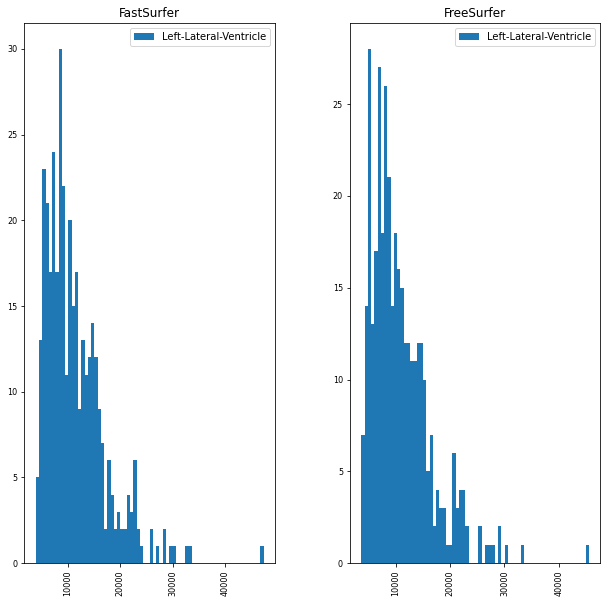

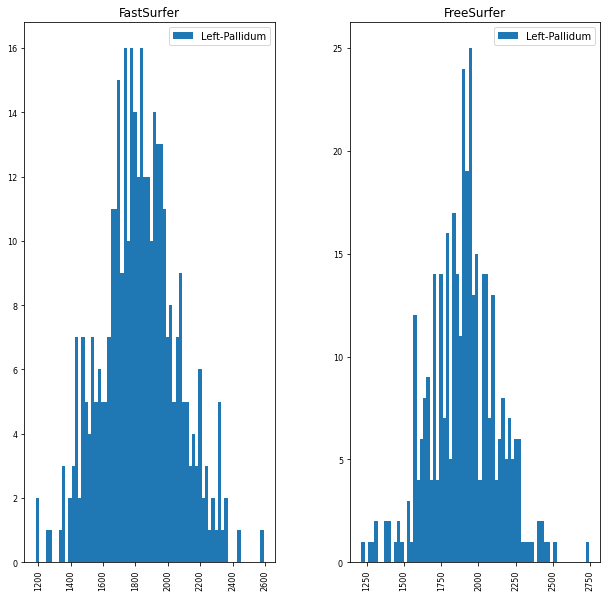

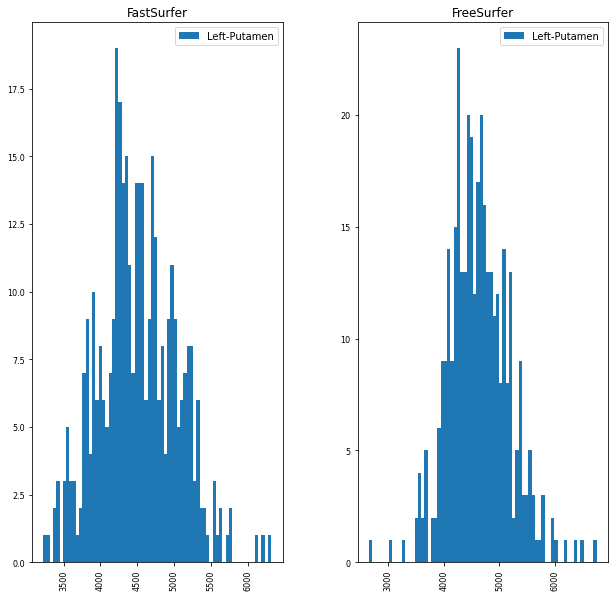

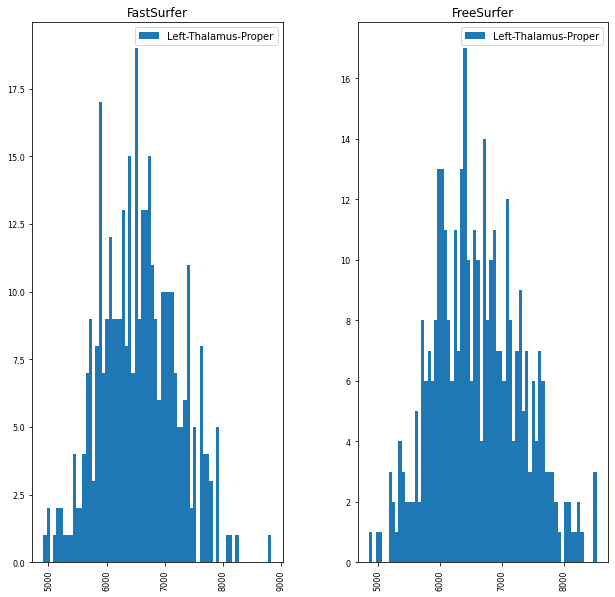

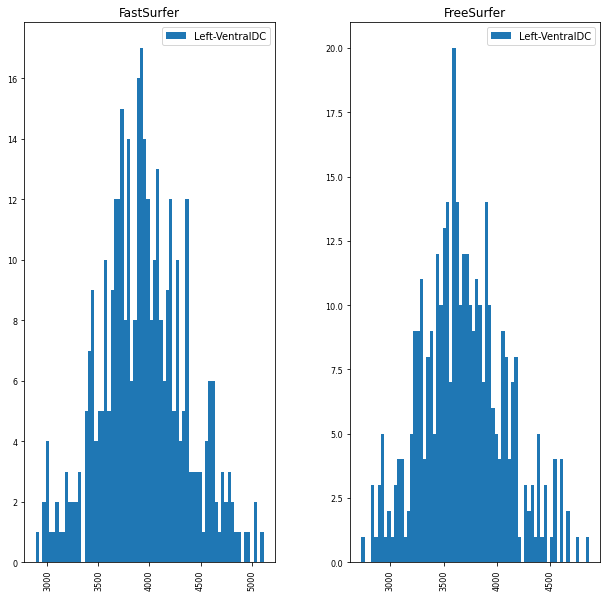

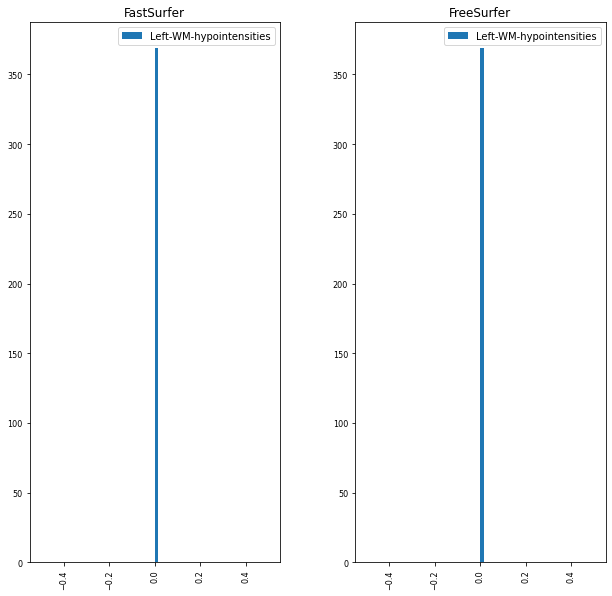

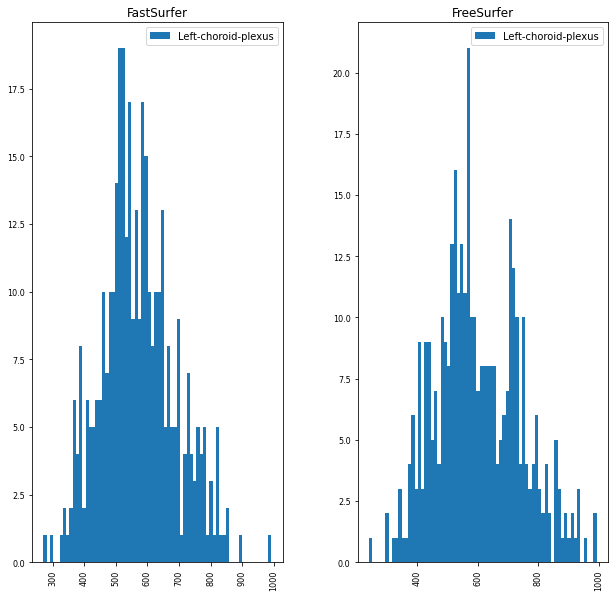

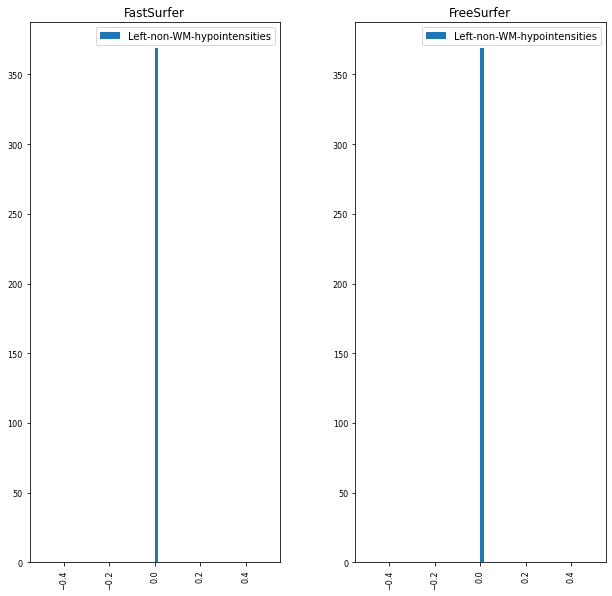

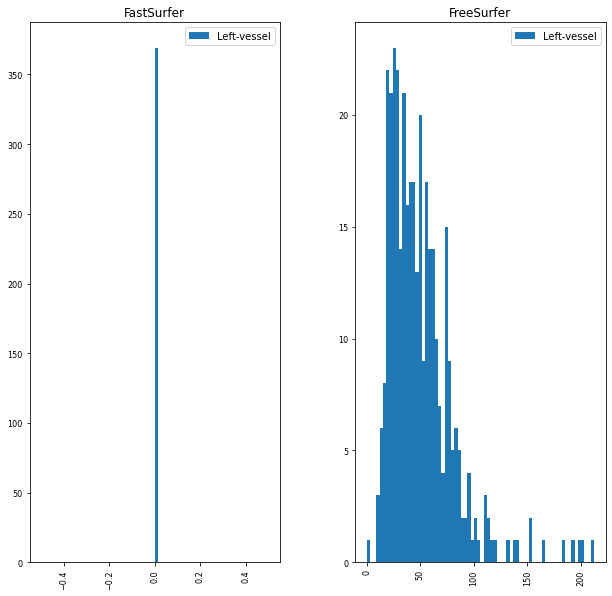

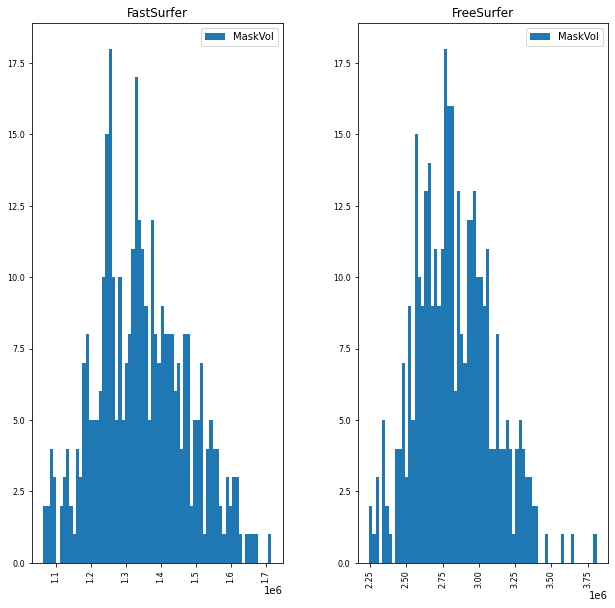

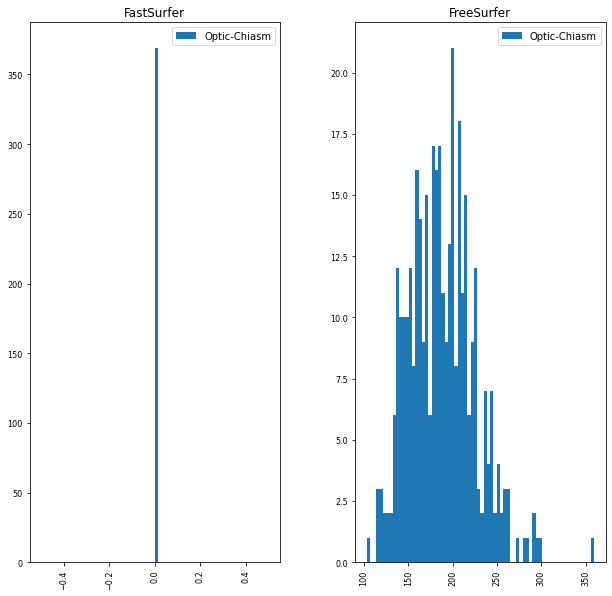

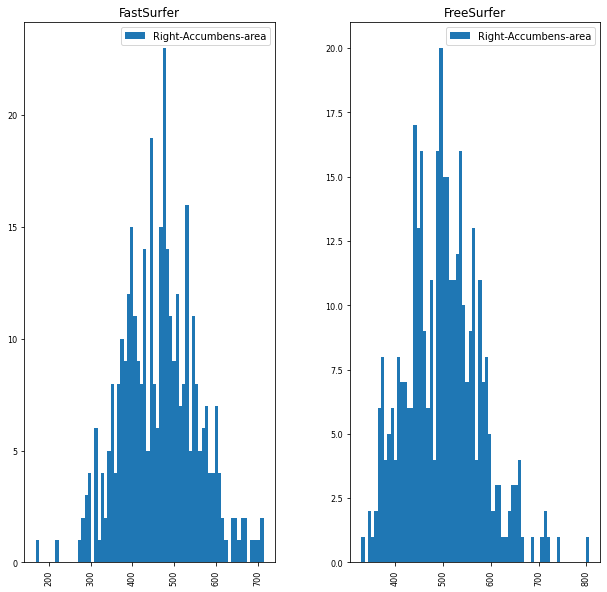

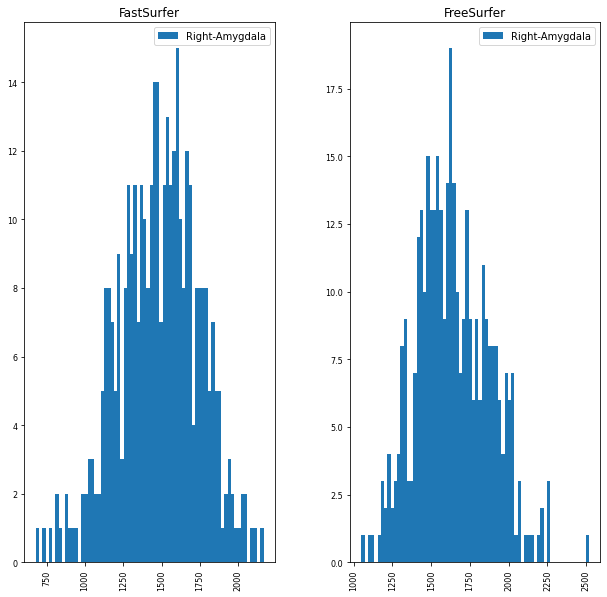

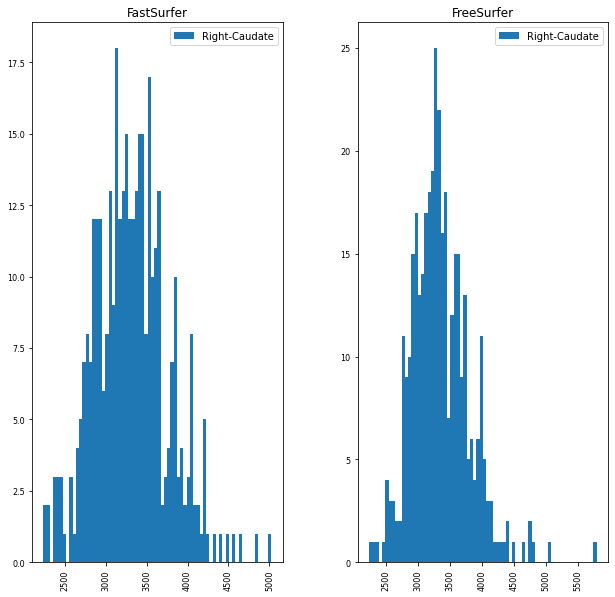

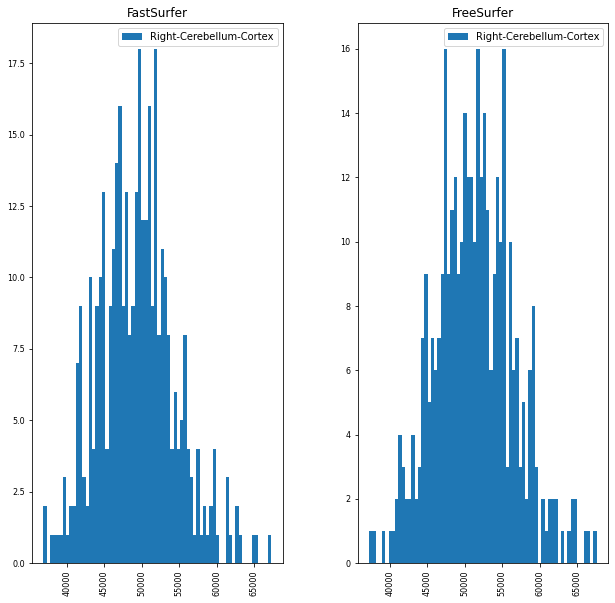

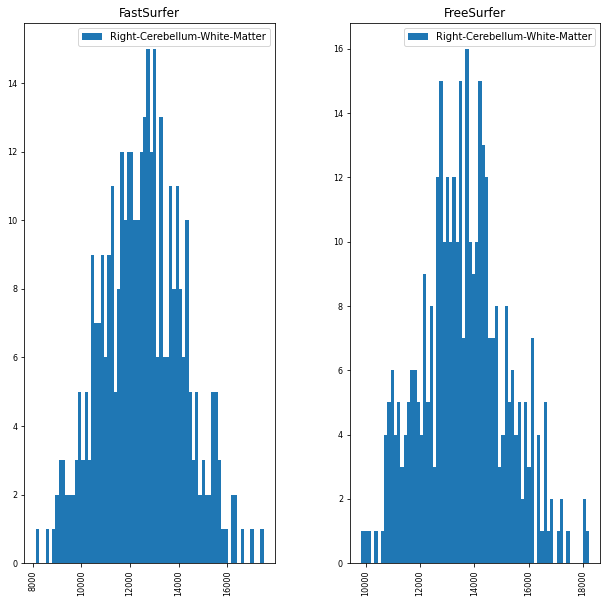

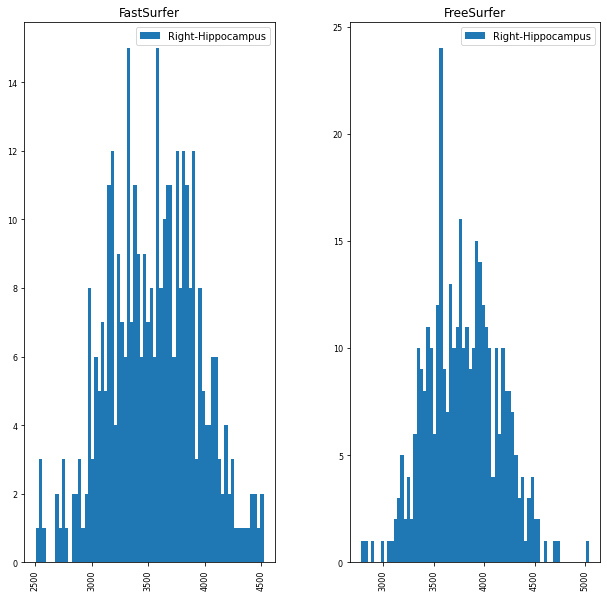

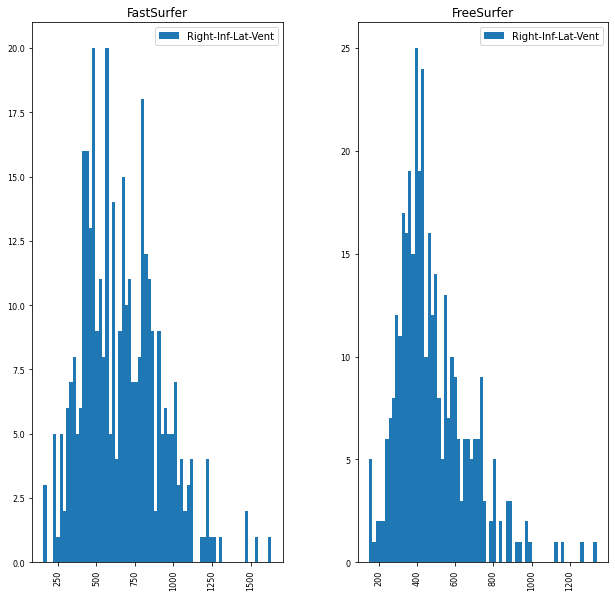

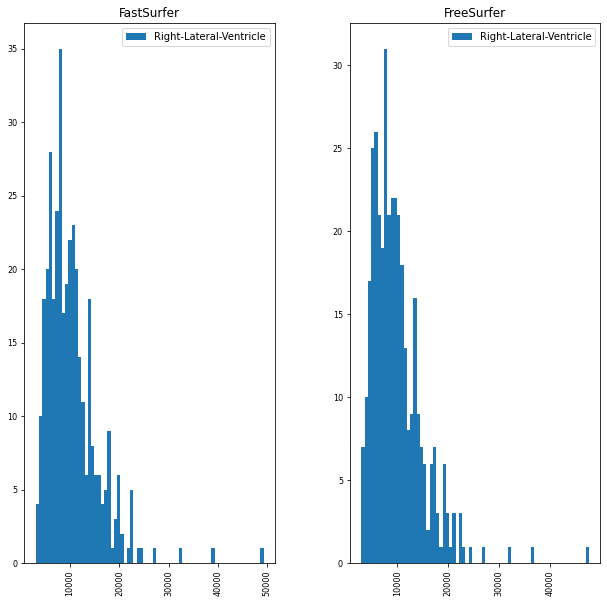

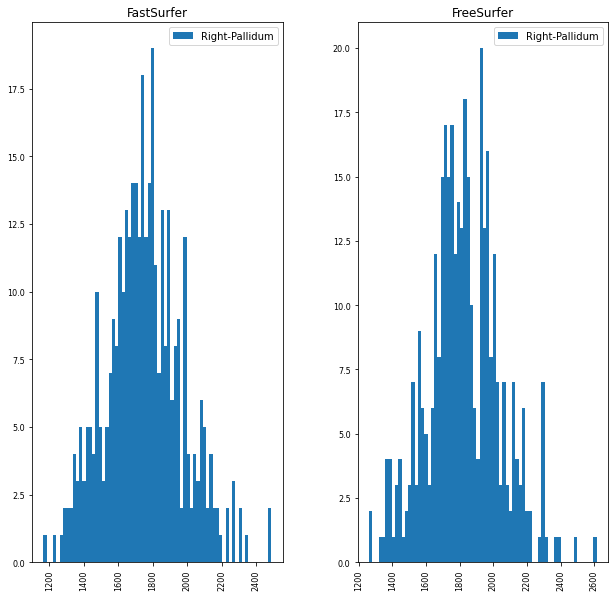

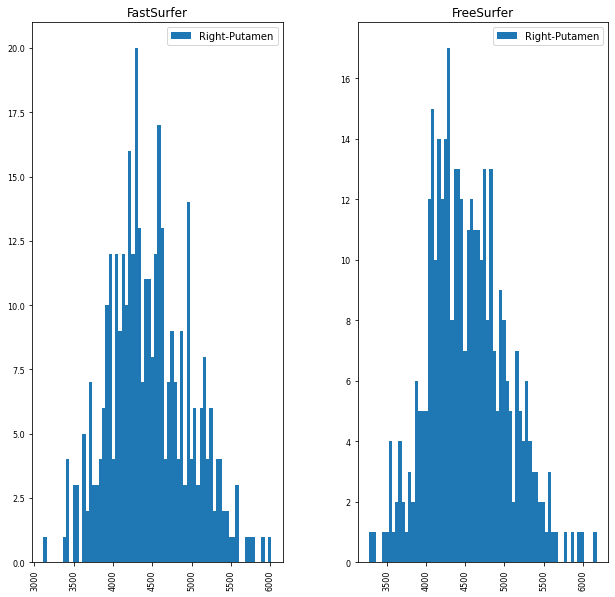

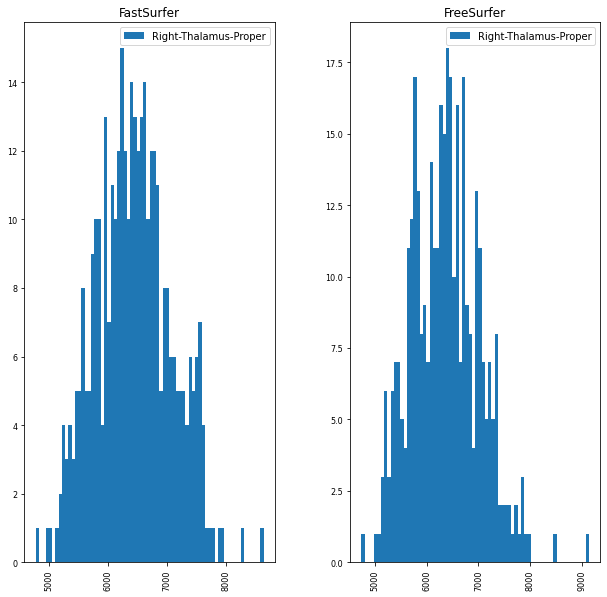

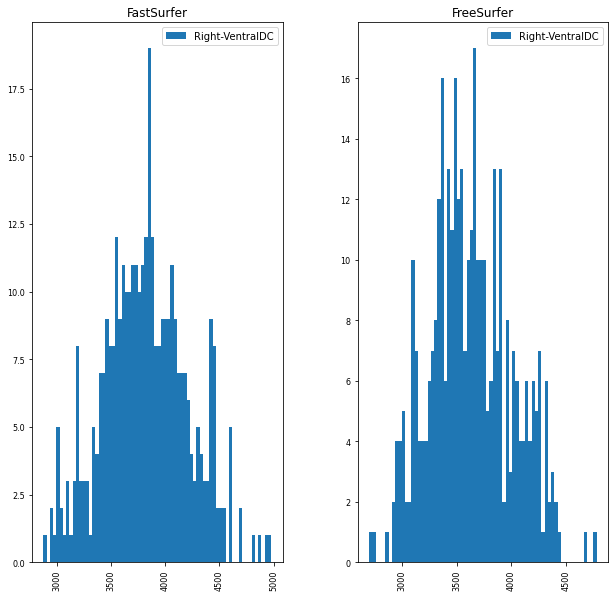

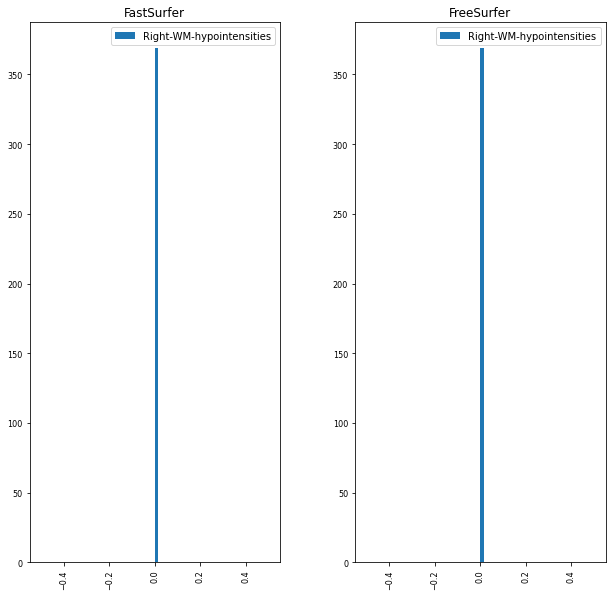

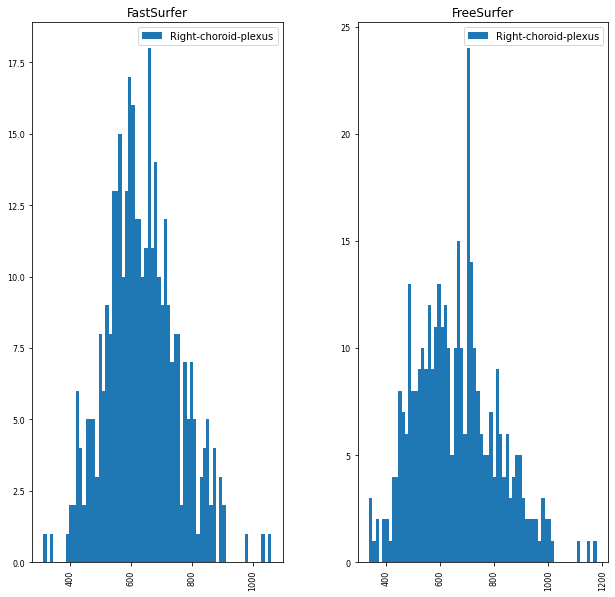

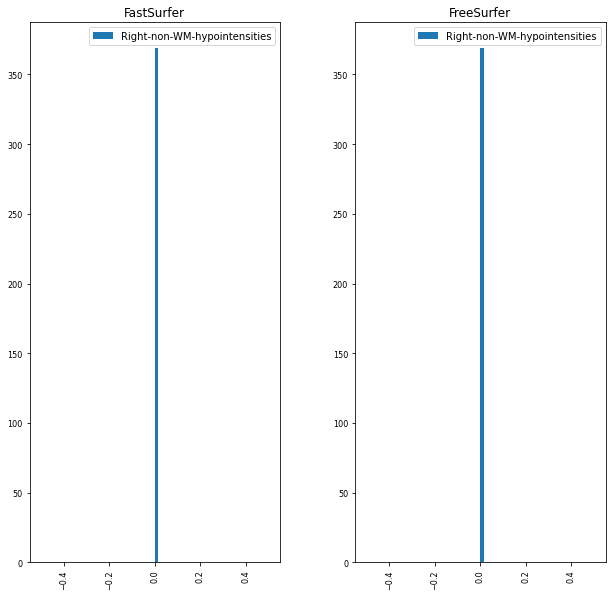

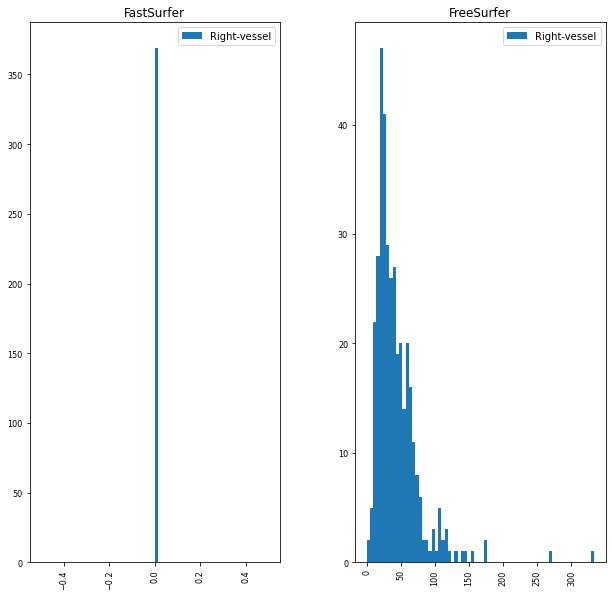

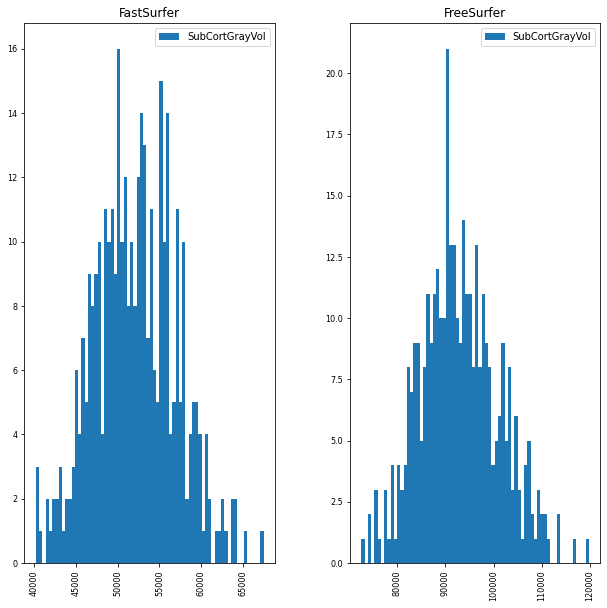

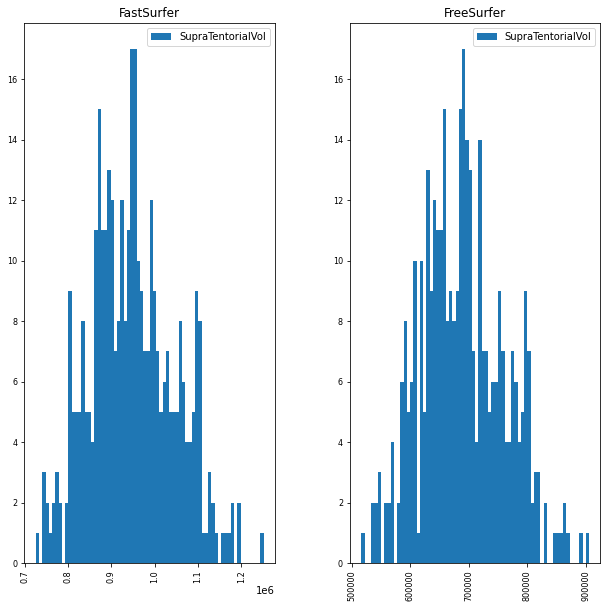

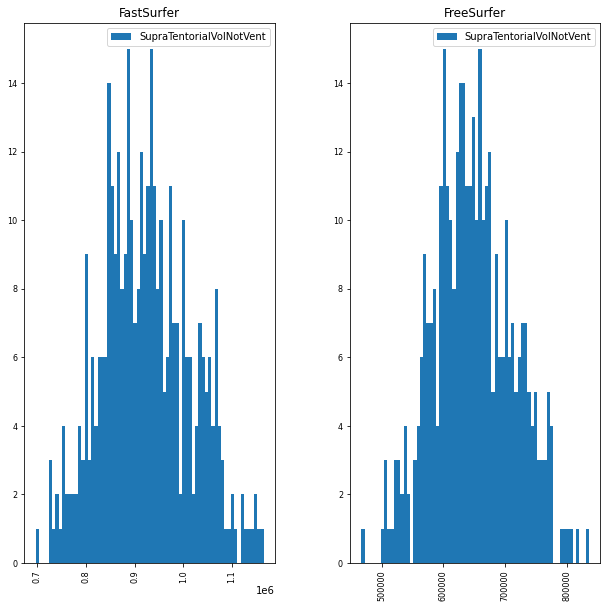

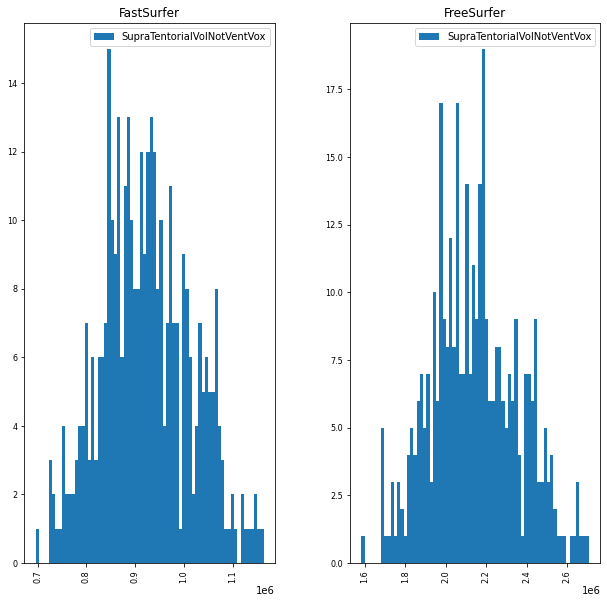

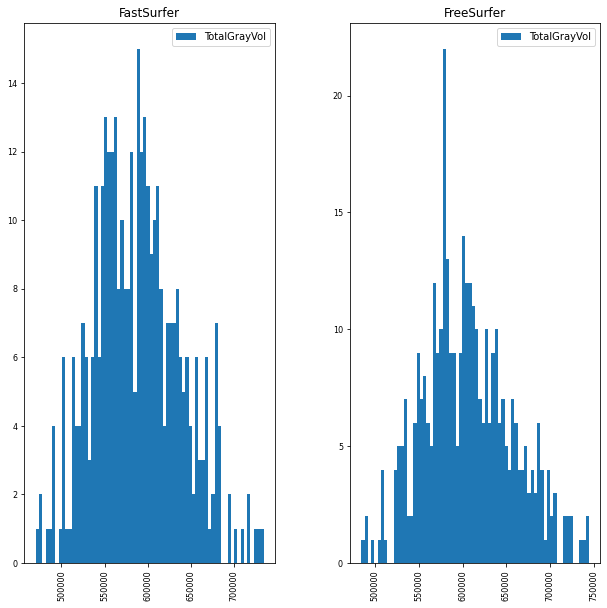

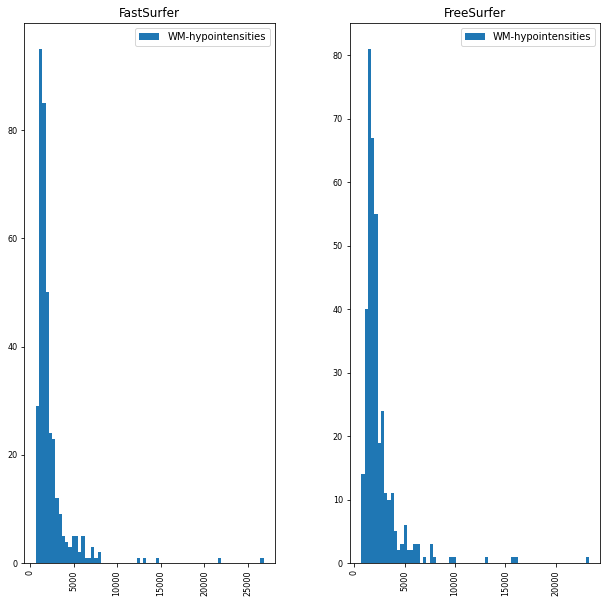

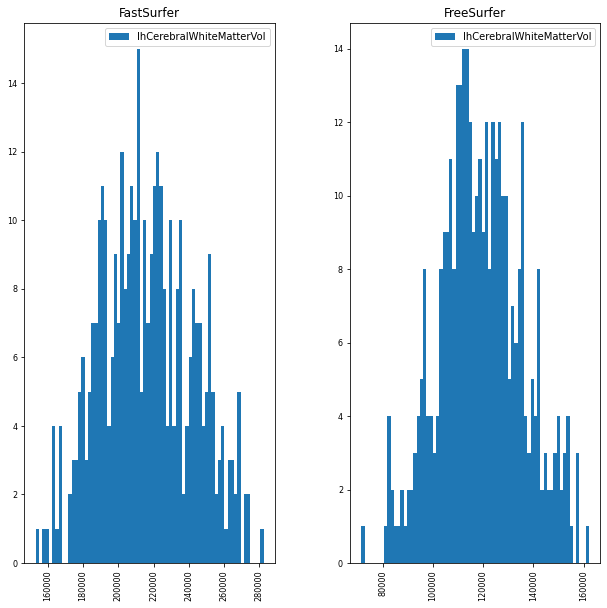

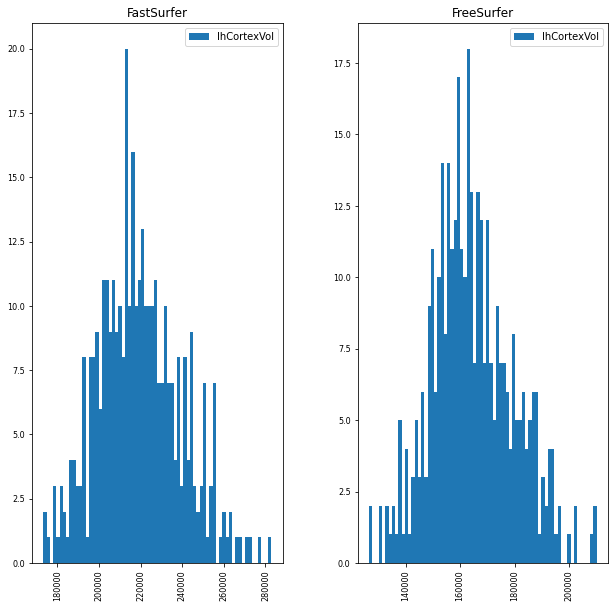

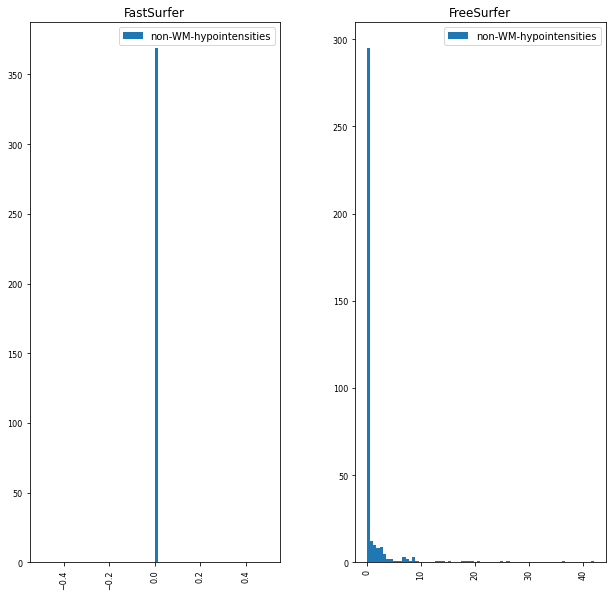

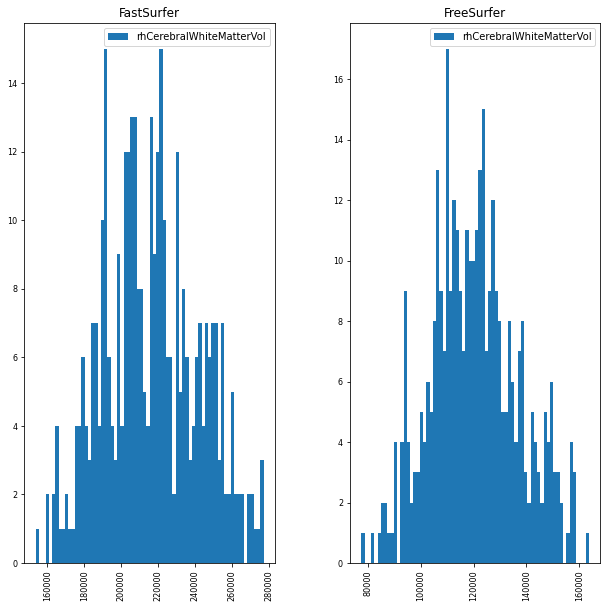

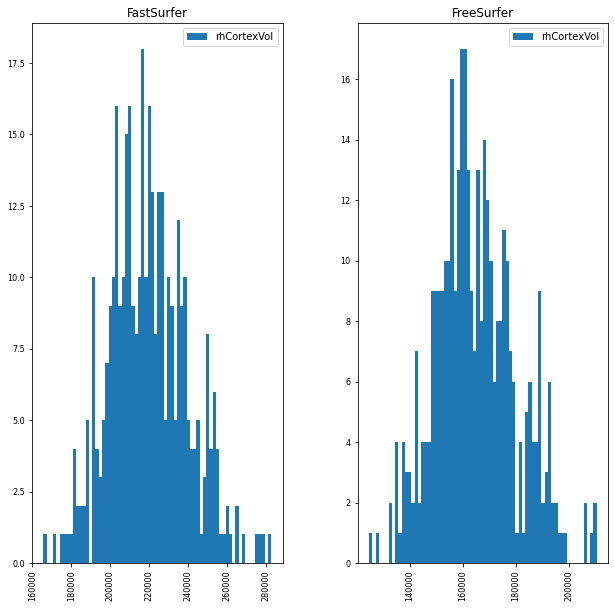

In [6]:
#Histograms

for i in range(len(concat_df.columns.tolist())):
    concat_df.hist(column=concat_df.columns[i],by='Software',figsize=(10,10), bins=70, xlabelsize=8, ylabelsize=8, legend=True)
    plt.show()

### Stats description grouped by Software

In [7]:
datasets_descriptions = concat_df.groupby('Software').describe()
datasets_descriptions

3rd-Ventricle                                                  \
                   count         mean         std    min     25%     50%   
Software                                                                   
FastSurfer         369.0  1353.888618  461.404776  542.2  1008.6  1265.8   
FreeSurfer         369.0  1294.013008  471.955969  453.6   929.7  1203.9   

                           4th-Ventricle               ...  \
               75%     max         count         mean  ...   
Software                                               ...   
FastSurfer  1620.4  3544.3         369.0  1905.631436  ...   
FreeSurfer  1560.7  3484.5         369.0  1758.709485  ...   

           rhCerebralWhiteMatterVol                rhCortexVol                 \
                                75%            max       count           mean   
Software                                                                        
FastSurfer            234650.542442  276971.491337       369.0  219457.900352   
FreeSurfer            130717.323491  163670.528182       369.0  164786.376512   

                                                                       \
                     std            min            25%            50%   
Software                                                                
FastSurfer  19879.883899  165726.271456  205678.610603  218384.288166   
FreeSurfer  15299.905137  124616.758937  154581.550632  162785.870425   

                                          
                      75%            max  
Software                                  
FastSurfer  232484.284825  282556.856944  
FreeSurfer  174505.278016  210502.892106  

[2 rows x 472 columns]

In [8]:
#Resetting the index to call Software column easily

concat_df.reset_index(level='Software', inplace=True)

In [9]:
concat_df.head()

,Software,3rd-Ventricle,4th-Ventricle,5th-Ventricle,Brain-Stem,BrainSegVol,BrainSegVolNotVent,BrainSegVolNotVentSurf,CC_Anterior,CC_Central,...,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,TotalGrayVol,WM-hypointensities,lhCerebralWhiteMatterVol,lhCortexVol,non-WM-hypointensities,rhCerebralWhiteMatterVol,rhCortexVol
subject,,,,,,,,,,,,,,,,,,,,,
10019,FastSurfer,2335.3,3003.2,0.0,22947.8,1206855.0,1175093.00,1.175647e+06,928.5,667.8,...,1.066739e+06,1.041607e+06,1039981.0,667488.665351,1927.9,241968.281419,251468.157656,0.0,241150.947036,249285.507695
10019,FreeSurfer,2280.7,2919.5,0.0,22887.2,2142567.0,2090436.75,1.355871e+06,644.2,297.6,...,7.833151e+05,7.423591e+05,2443176.0,688073.066914,2255.2,138740.914865,189994.281391,0.0,138535.085734,190329.035524
10026,FastSurfer,2017.8,2357.3,0.0,20385.5,1110897.0,1059210.00,1.059082e+06,950.0,450.6,...,1.002746e+06,9.567843e+05,956002.0,606974.728489,2325.5,214797.860888,238147.069588,0.0,215416.673620,236342.658901
10026,FreeSurfer,1948.6,2111.0,0.0,18946.6,1947982.5,1858903.50,1.145995e+06,687.2,312.0,...,7.289274e+05,6.494297e+05,2214913.0,602434.109773,2676.0,109061.711366,180018.256381,2.1,107108.351461,176151.853391
10032,FastSurfer,1020.2,1350.3,0.0,21828.4,1204293.0,1183601.00,1.184661e+06,1060.9,914.8,...,1.077000e+06,1.059472e+06,1057021.0,623645.895177,894.3,263883.923522,233179.819260,0.0,269911.449888,235479.075916


### Creation of functions to obtain mean difference and standard deviation

In [128]:
def dif_medias(atributo):
    
    dif_observada = (concat_df[atributo][concat_df.Software == 'FastSurfer'].mean()
                 - concat_df[atributo][concat_df.Software == 'FreeSurfer'].mean())
    if dif_observada > 0:
        mayor = '(bigger in FastSurfer)'
    elif dif_observada < 0:
        mayor = '(bigger in FreeSurfer)'
    else:
        mayor = ''
    print(f"Mean difference observed in {atributo}: {abs(dif_observada)} {mayor}")

def desv(atributo):
    desv_FastS = concat_df[atributo][concat_df.Software == 'FastSurfer'].std()
    desv_FreeS = concat_df[atributo][concat_df.Software == 'FreeSurfer'].std()

    print(f"Standard deviation observed in {atributo} in FastSurfer: {desv_FastS}")
    print(f"Standard deviation observed in {atributo} in FreeSurfer: {desv_FreeS}")

### Creation of function to obtain some distribution graphics

In [129]:
# Observed distribution graphics
# ==============================================================================

def graficos(atributo):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
    sns.violinplot(
        x     = concat_df[atributo],
        y     = concat_df.Software,
        color = ".8",
        ax    = axs[0]
    )
    sns.stripplot(
        x    = concat_df[atributo],
        y    = concat_df.Software,
        data = concat_df,
        size = 4,
        jitter  = 0.1,
        palette = 'tab10',
        ax = axs[0]
    )
    axs[0].set_title('Value distributions by group')
    axs[0].set_ylabel('Software')
    axs[0].set_xlabel(atributo);

    for Software in concat_df.Software.unique():
        datos_temp = concat_df[concat_df.Software == Software][atributo]
        datos_temp.plot.kde(ax=axs[1], label=Software)
        axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

    axs[1].set_title('Value distributions by group')
    axs[1].set_xlabel(atributo);
    axs[1].legend()

    fig.tight_layout();



In [130]:
for i in concat_df.columns:
    if i == 'Software':
        continue
    else:
        dif_medias(i)
        desv(i)
        print('\n')
        

Mean difference observed in 3rd-Ventricle: 59.8756097560979 (bigger in FastSurfer)
Standard deviation observed in 3rd-Ventricle in FastSurfer: 461.40477558789183
Standard deviation observed in 3rd-Ventricle in FreeSurfer: 471.9559694642472


Mean difference observed in 4th-Ventricle: 146.92195121951204 (bigger in FastSurfer)
Standard deviation observed in 4th-Ventricle in FastSurfer: 480.72089546342755
Standard deviation observed in 4th-Ventricle in FreeSurfer: 491.9381576125431


Mean difference observed in 5th-Ventricle: 0.1013550135501355 (bigger in FreeSurfer)
Standard deviation observed in 5th-Ventricle in FastSurfer: 0.0
Standard deviation observed in 5th-Ventricle in FreeSurfer: 1.0942156741509768


Mean difference observed in Brain-Stem: 571.3585365853687 (bigger in FastSurfer)
Standard deviation observed in Brain-Stem in FastSurfer: 2227.8700200501085
Standard deviation observed in Brain-Stem in FreeSurfer: 2247.3884926166543


Mean difference observed in BrainSegVol: 813453.0

<div class="alert alert-block alert-info">
Significant differences are observed in the following regions:

    -BrainSegVol 
    -BrainSegVolNotVent
    -BrainSegVolNotVentSurf
    -CC_Anterior
    -CC_Central
    -CC_Mid_Anterior
    -CerebralWhiteMatterVol
    -Left-Inf-Lat-Vent
    -MaskVol
    -Right-Inf-Lat-Vent
    -SubCortGrayVol
    -SupraTentorialVol
    -SupraTentorialVolNotVent
    -SupraTentorialVolNotVentVox
    -lhCerebralWhiteMatterVol
    -lhCortexVol
    -rhCerebralWhiteMatterVol
    -rhCortexVol

</div>

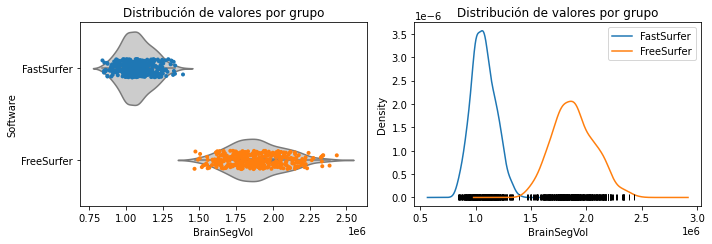

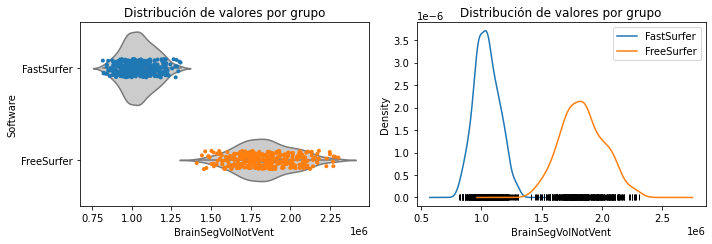

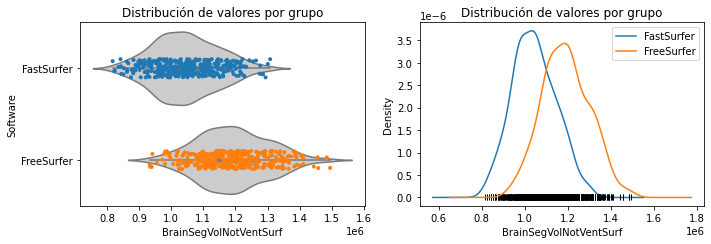

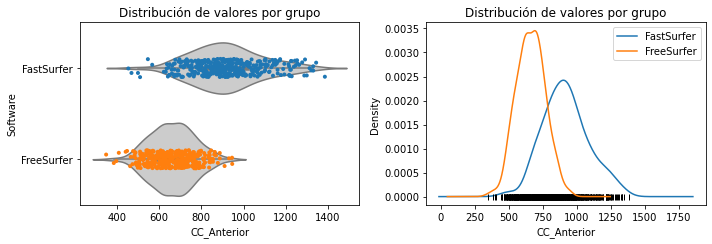

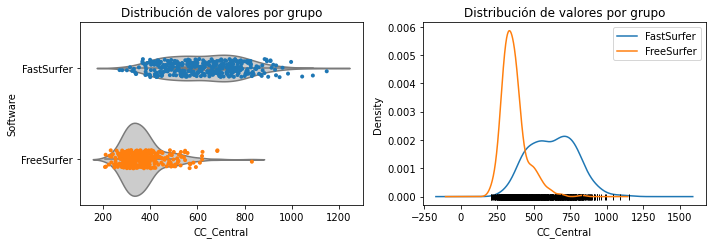

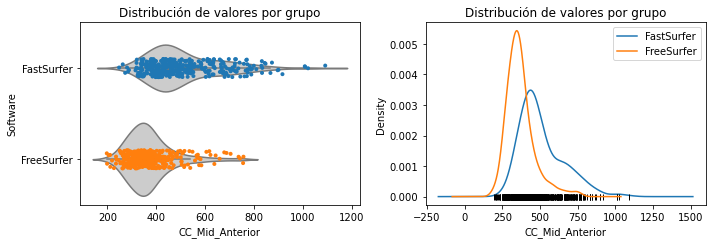

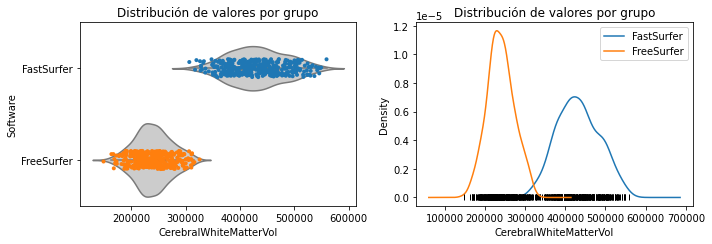

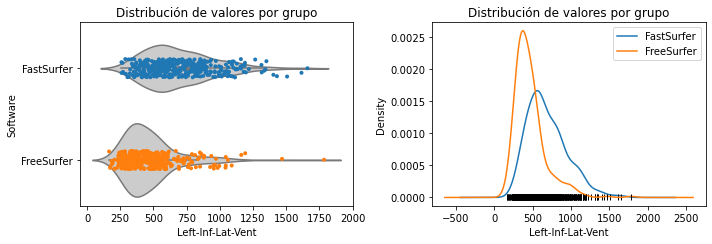

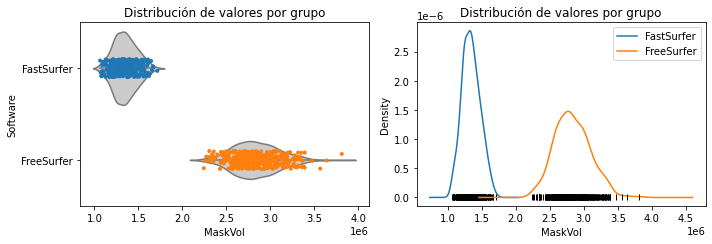

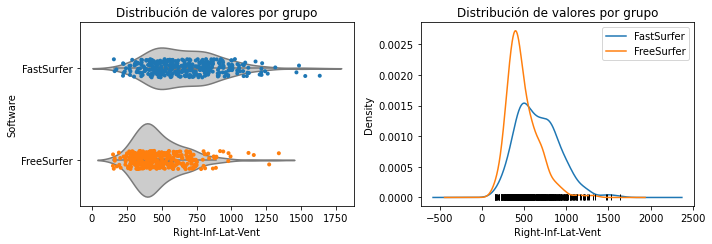

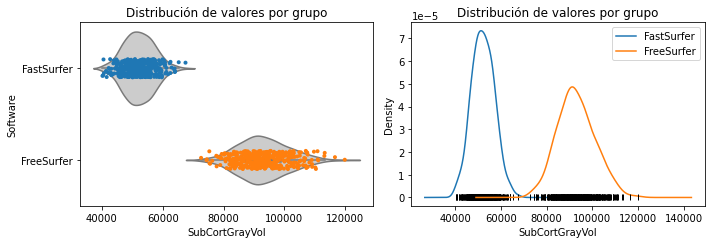

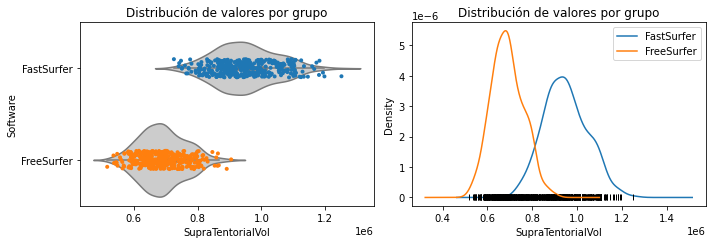

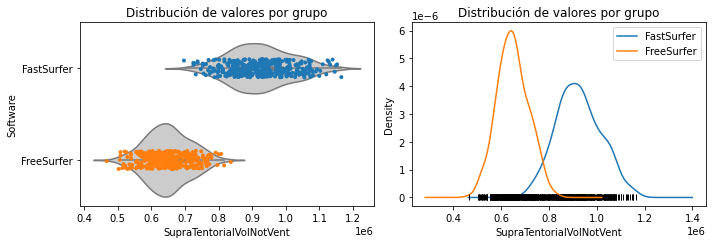

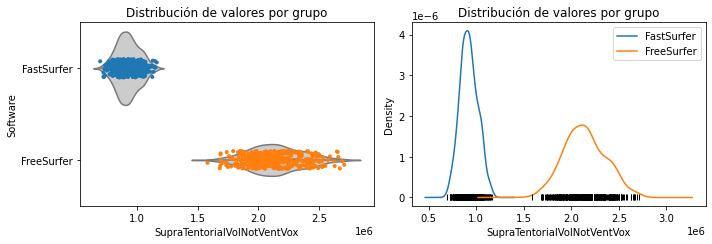

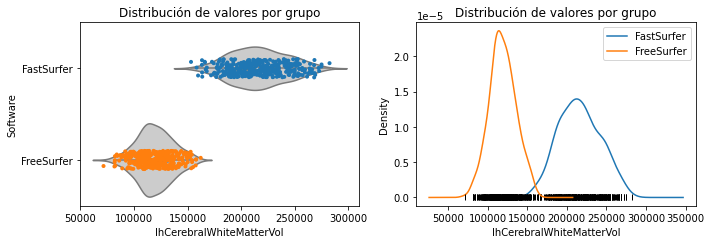

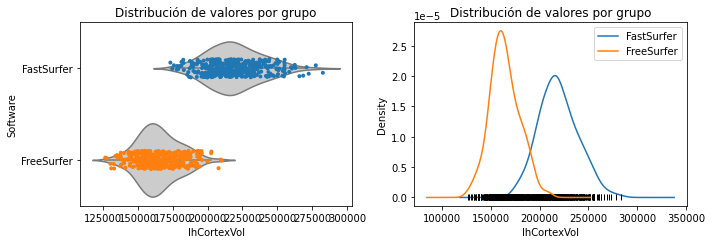

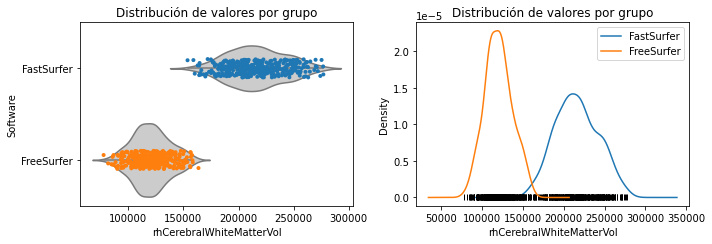

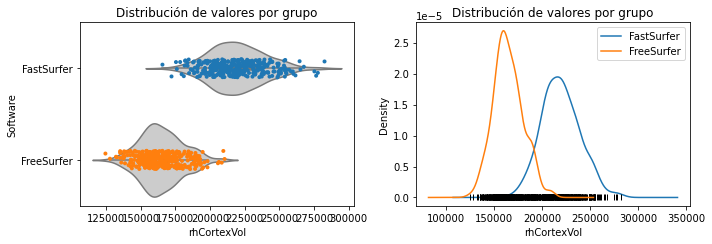

In [124]:
graficos('BrainSegVol')
graficos('BrainSegVolNotVent')
graficos('BrainSegVolNotVentSurf')
graficos('CC_Anterior')
graficos('CC_Central')
graficos('CC_Mid_Anterior')
graficos('CerebralWhiteMatterVol')
graficos('Left-Inf-Lat-Vent')
graficos('MaskVol')
graficos('Right-Inf-Lat-Vent')
graficos('SubCortGrayVol')
graficos('SupraTentorialVol')
graficos('SupraTentorialVolNotVent')
graficos('SupraTentorialVolNotVentVox')
graficos('lhCerebralWhiteMatterVol')
graficos('lhCortexVol')
graficos('rhCerebralWhiteMatterVol')
graficos('rhCortexVol')

<div class="alert alert-block alert-info">
Furthermore, FastSurfer hasn't segmentated in the following regions:
    
    -5th-Ventricle
    -Left-WM-hypointensities
    -Left-non-WM-hypointensities
    -Left-vessel
    -Optic-Chiasm
    -Right-WM-hypointensities (tampoco realizó segmentación FreeSurfer)
    -Right-non-WM-hypointensities (tampoco realizó segmentación FreeSurfer)
    -Right-vessel
    -non-WM-hypointensities
    
</div>